# Taxi Cab Data Project

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.svm import SVC

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
rawData = pd.read_csv('Green_Reduced.csv')
rawData2 = pd.read_csv('Yellow_Reduced.csv')
display(rawData2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,Pickup_longitude,Pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,VTS,2014-09-10 12:19:00,2014-09-10 12:39:00,2.0,1.53,-73.962270,40.779057,1.0,NaN,-73.976247,40.759452,CSH,13.5,0.0,0.5,0.00,0.00,14.00
2,VTS,2014-09-10 12:33:00,2014-09-10 12:41:00,1.0,0.50,-73.974030,40.762792,1.0,NaN,-73.978342,40.756787,UNK,6.0,0.0,0.5,1.20,0.00,7.70
3,VTS,2014-09-10 12:31:00,2014-09-10 12:39:00,5.0,1.25,-73.980520,40.738287,1.0,NaN,-73.994565,40.729317,CSH,7.0,0.0,0.5,0.00,0.00,7.50
4,VTS,2014-09-10 12:33:00,2014-09-10 12:42:00,1.0,0.87,-73.970720,40.764770,1.0,NaN,-73.964610,40.757930,CRD,6.5,0.0,0.5,1.30,0.00,8.30
5,VTS,2014-09-10 12:30:00,2014-09-10 12:41:00,6.0,1.70,-73.978070,40.737490,1.0,NaN,-73.962320,40.759220,CRD,9.5,0.0,0.5,2.38,0.00,12.38
6,VTS,2014-09-10 12:27:00,2014-09-10 12:38:00,1.0,1.20,-73.961130,40.774877,1.0,NaN,-73.972142,40.760317,CRD,8.5,0.0,0.5,2.12,0.00,11.12
7,VTS,2014-09-10 12:37:00,2014-09-10 12:41:00,5.0,0.77,-73.992985,40.758040,1.0,NaN,-73.989607,40.765430,CRD,5.0,0.0,0.5,1.00,0.00,6.50
8,VTS,2014-09-10 12:40:00,2014-09-10 12:44:00,1.0,0.45,-74.000350,40.737895,1.0,NaN,-74.007353,40.740950,CRD,4.5,0.0,0.5,0.75,0.00,5.75
9,VTS,2014-09-10 12:32:00,2014-09-10 12:44:00,2.0,0.88,-73.981312,40.763527,1.0,NaN,-73.989945,40.752332,CRD,8.5,0.0,0.5,1.70,0.00,10.70


In [3]:
rawData = rawData.drop(0)
rawData = rawData[rawData['Fare_amount'] >= 0]
rawData = rawData[rawData['Tip_amount'] >= 0]
rawData['tip_frac'] = rawData['Tip_amount']/rawData['Fare_amount']
rawData = rawData[rawData['tip_frac'] <= 50.0]


rawData2 = rawData2.drop(0)#
rawData2 = rawData2[rawData2['total_amount'] >= 0]
rawData2 = rawData2[rawData2['tip_amount'] >= 0]
rawData2['tip_frac'] = rawData2['tip_amount']/rawData2['fare_amount']
rawData2 = rawData2[rawData2['tip_frac'] <= 50.0]
display(rawData2)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,Pickup_longitude,Pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip_frac
1,VTS,2014-09-10 12:19:00,2014-09-10 12:39:00,2.0,1.53,-73.962270,40.779057,1.0,NaN,-73.976247,40.759452,CSH,13.5,0.0,0.5,0.00,0.00,14.00,0.000000
2,VTS,2014-09-10 12:33:00,2014-09-10 12:41:00,1.0,0.50,-73.974030,40.762792,1.0,NaN,-73.978342,40.756787,UNK,6.0,0.0,0.5,1.20,0.00,7.70,0.200000
3,VTS,2014-09-10 12:31:00,2014-09-10 12:39:00,5.0,1.25,-73.980520,40.738287,1.0,NaN,-73.994565,40.729317,CSH,7.0,0.0,0.5,0.00,0.00,7.50,0.000000
4,VTS,2014-09-10 12:33:00,2014-09-10 12:42:00,1.0,0.87,-73.970720,40.764770,1.0,NaN,-73.964610,40.757930,CRD,6.5,0.0,0.5,1.30,0.00,8.30,0.200000
5,VTS,2014-09-10 12:30:00,2014-09-10 12:41:00,6.0,1.70,-73.978070,40.737490,1.0,NaN,-73.962320,40.759220,CRD,9.5,0.0,0.5,2.38,0.00,12.38,0.250526
6,VTS,2014-09-10 12:27:00,2014-09-10 12:38:00,1.0,1.20,-73.961130,40.774877,1.0,NaN,-73.972142,40.760317,CRD,8.5,0.0,0.5,2.12,0.00,11.12,0.249412
7,VTS,2014-09-10 12:37:00,2014-09-10 12:41:00,5.0,0.77,-73.992985,40.758040,1.0,NaN,-73.989607,40.765430,CRD,5.0,0.0,0.5,1.00,0.00,6.50,0.200000
8,VTS,2014-09-10 12:40:00,2014-09-10 12:44:00,1.0,0.45,-74.000350,40.737895,1.0,NaN,-74.007353,40.740950,CRD,4.5,0.0,0.5,0.75,0.00,5.75,0.166667
9,VTS,2014-09-10 12:32:00,2014-09-10 12:44:00,2.0,0.88,-73.981312,40.763527,1.0,NaN,-73.989945,40.752332,CRD,8.5,0.0,0.5,1.70,0.00,10.70,0.200000
10,VTS,2014-09-10 12:40:00,2014-09-10 12:43:00,1.0,0.48,-73.981370,40.781070,1.0,NaN,-73.980990,40.786840,CSH,4.5,0.0,0.5,0.00,0.00,5.00,0.000000


## 2. Initial poking around of the data

In [4]:
rawData['Tip_amount'].mean()

1.0909950998869207

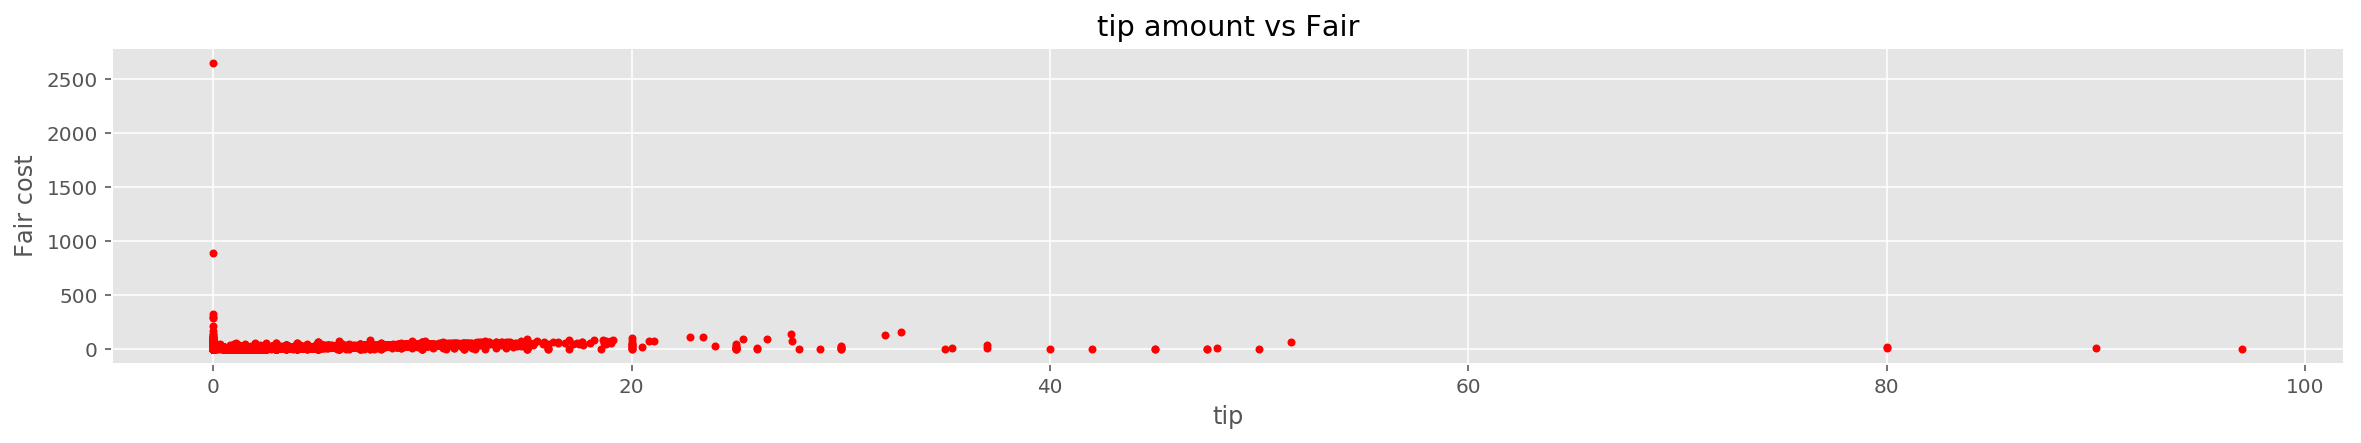

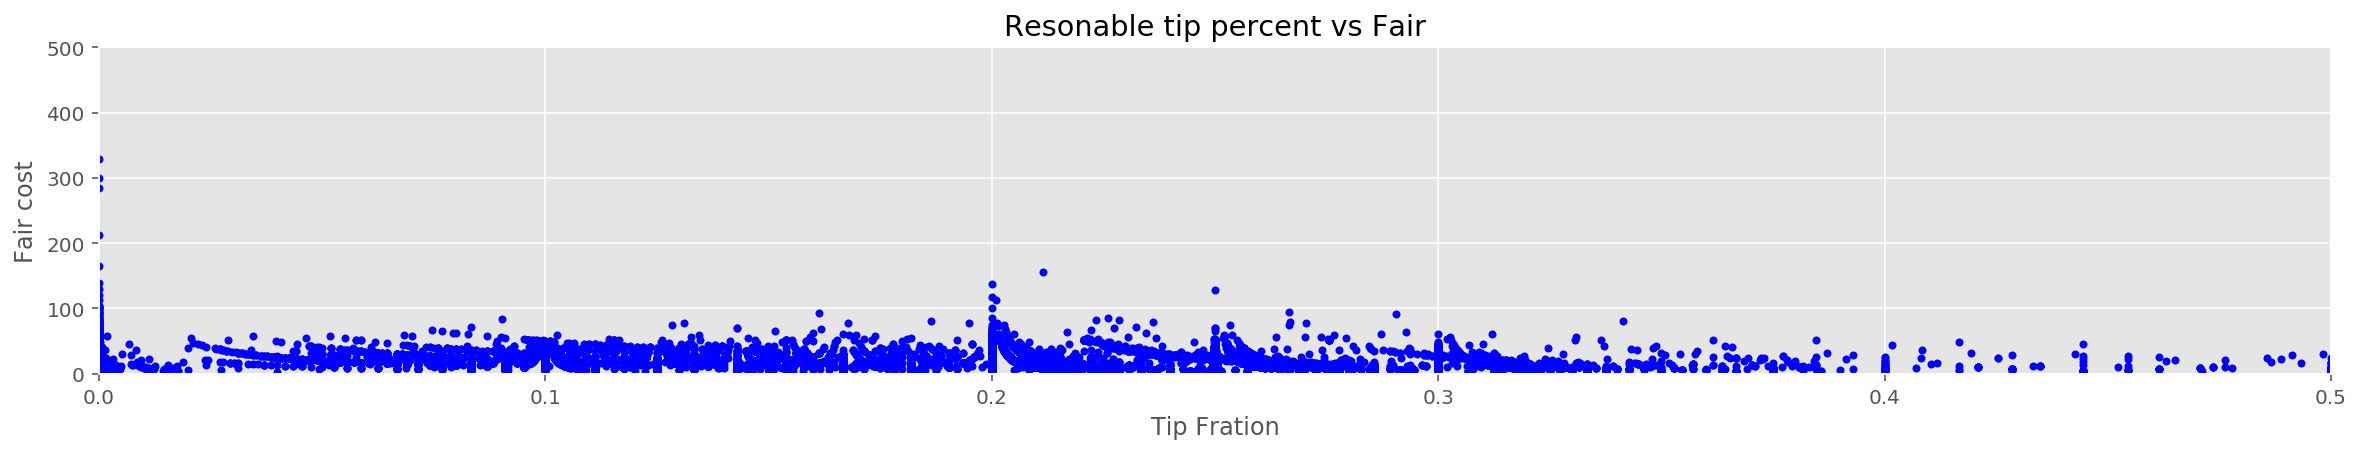

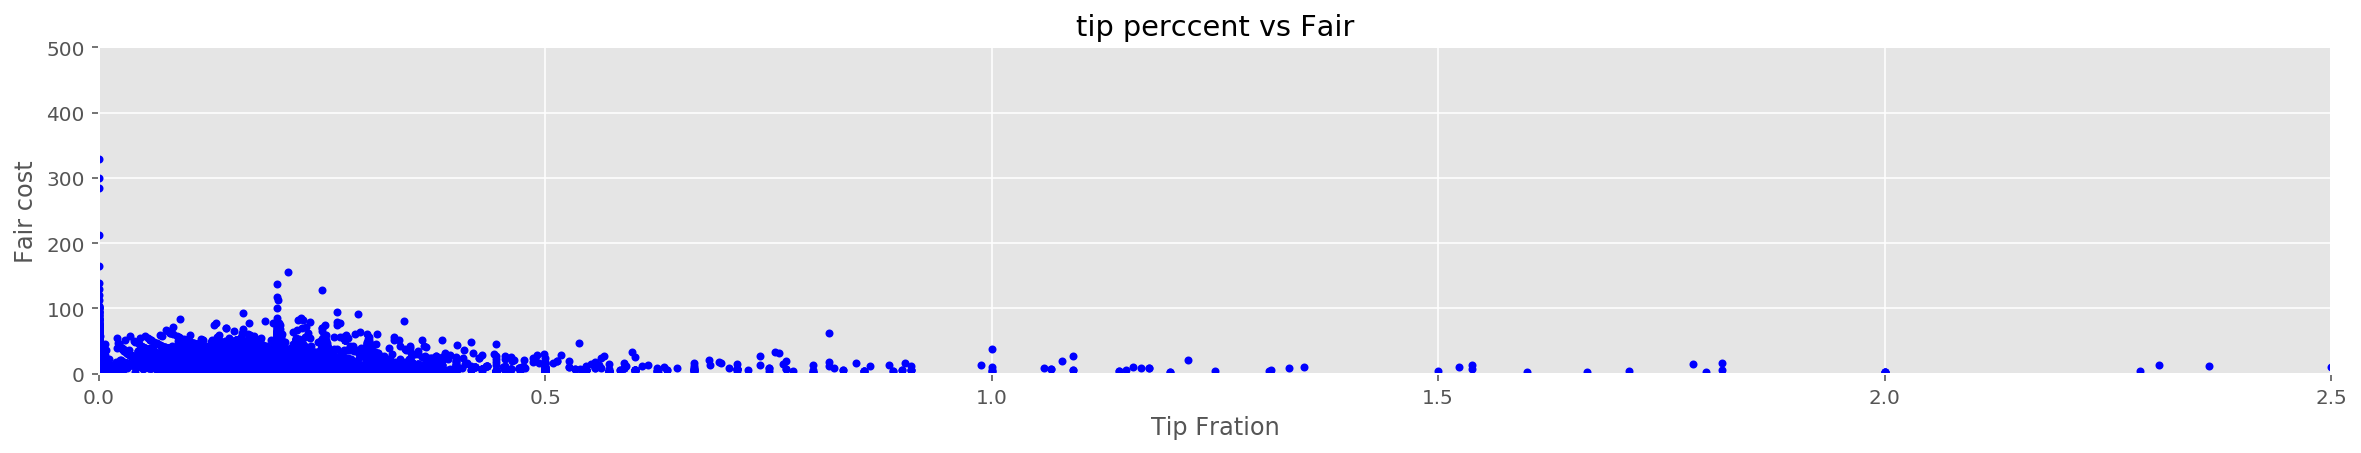

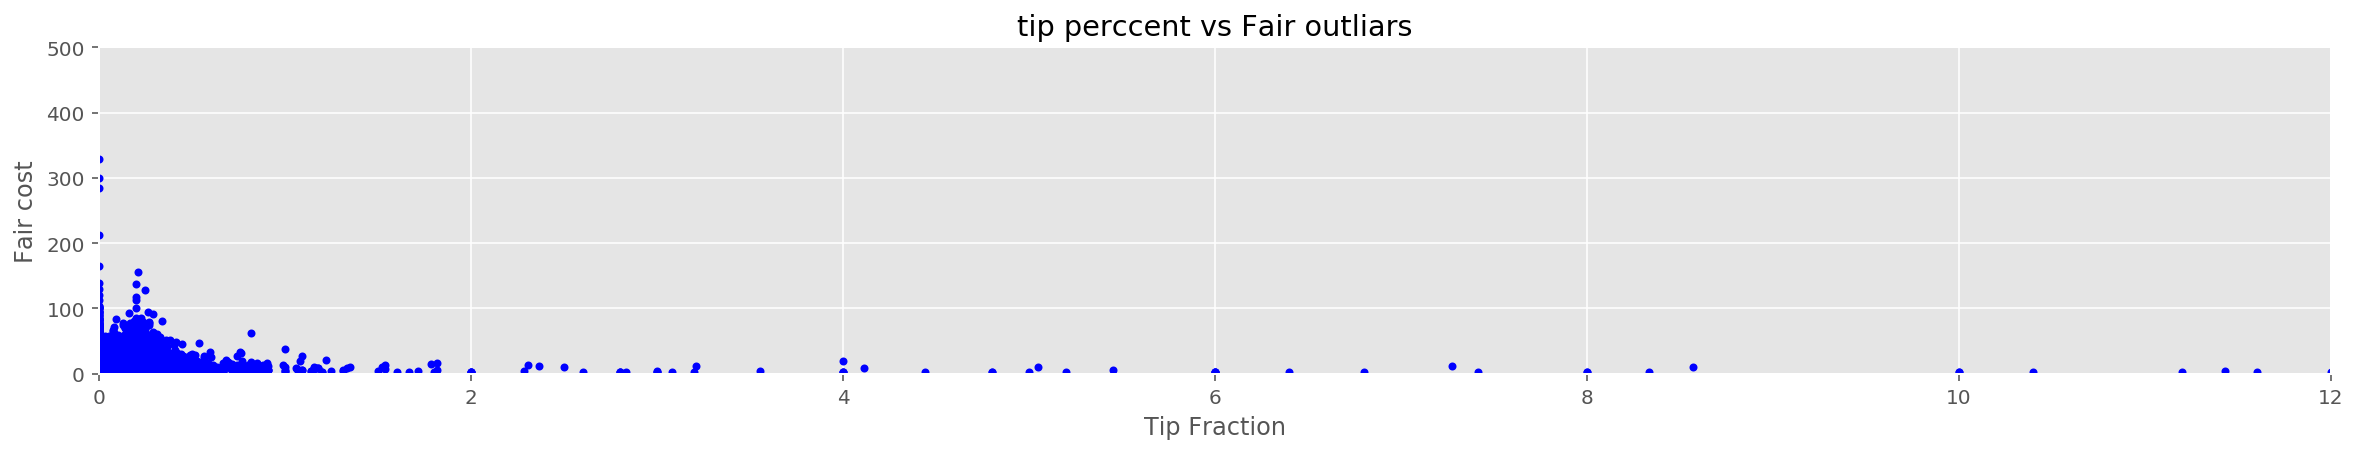

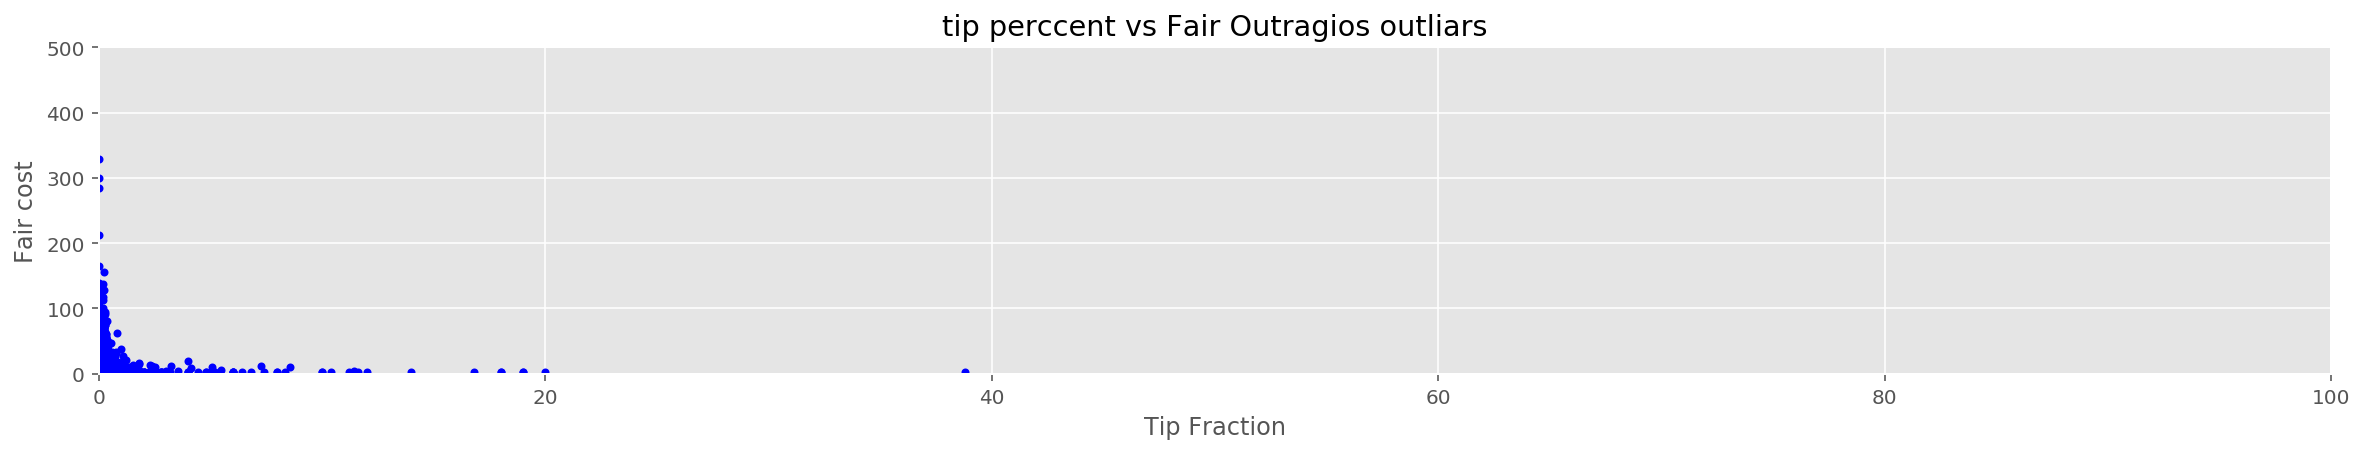

In [5]:
plt.rcParams["figure.figsize"] = (20,3)
plt.gcf().subplots_adjust(bottom=0.15)

plt.plot(rawData["Tip_amount"], rawData["Fare_amount"], 'r.')
plt.title("tip amount vs Fair")
plt.ylabel("Fair cost")
plt.xlabel("tip")
plt.savefig('tip amount vs Fair.png')
plt.show()

plt.plot(rawData["tip_frac"], rawData["Fare_amount"], 'b.')
plt.title("Resonable tip percent vs Fair")
plt.ylabel("Fair cost")
plt.xlabel("Tip Fration")
plt.xlim(0,.5)
plt.ylim(0,500)
plt.savefig('Resonable tip percent vs Fair.png')
plt.show()

plt.plot(rawData["tip_frac"], rawData["Fare_amount"], 'b.')
plt.title("tip perccent vs Fair")
plt.ylabel("Fair cost")
plt.xlabel("Tip Fration")
plt.xlim(0,2.5)
plt.ylim(0,500)
plt.savefig('foo.png')
plt.show()

plt.plot(rawData["tip_frac"], rawData["Fare_amount"], 'b.')
plt.title("tip perccent vs Fair outliars")
plt.ylabel("Fair cost")
plt.xlabel("Tip Fraction")
plt.xlim(0,12)
plt.ylim(0,500)
plt.show()

plt.plot(rawData["tip_frac"], rawData["Fare_amount"], 'b.')
plt.title("tip perccent vs Fair Outragios outliars")
plt.ylabel("Fair cost")
plt.xlabel("Tip Fraction")
plt.xlim(0,100)
plt.ylim(0,500)
plt.savefig('plt.title("tip perccent vs Fair Outragios outliars").png',dpi=1000)
plt.show()
#1= Credit card
#2= Cash
#3= No charge
#4= Dispute
#5= Unknown
#6= Voided trip
#card = 0
#cash = 0
#noCharge = 0
#dispute = 0
#unknown = 0 
#void = 0
#for i in rawData["payment_type"]:
#    if i == 1:
#        card += 1
#    elif i == 2:
#        cash += 1
#    elif i == 3:
#        noCharge += 1
#    elif i == 4:
#        dispute += 1
#    elif i == 5:
#        unknown += 1
#    elif i == 6:
#        void += 1
#print("Card:", card, "   Cash:", cash, "   No Charge:", noCharge, 
#      "   Dispute:", dispute, "   unknown:", unknown, "   void:", void)
#print("\nPercents")
#print("Card:", card/69925, "   Cash:", cash/69925, "   No Charge:", noCharge/69925, 
#      "   Dispute:", dispute/69925, "   unknown:", unknown/69925, "   void:", void/69925)

In [6]:
dfcard = rawData[rawData['payment_type'] == 1]
dfcash = rawData[rawData['payment_type'] == 2]
dfno = rawData[rawData['payment_type'] == 3]
dfdisp = rawData[rawData['payment_type'] == 4]
plt.plot(dfcard["tip_frac"], dfcard["fare_amount"], 'b.')
plt.title("tip perccent vs Fair Outragios outliars")
plt.ylabel("Fair cost")
plt.xlabel("Tip Fraction")
plt.xlim(0,2.5)
plt.ylim(ymin=0)
plt.show()
display(dfcard.describe())
dfcash.describe()
print("Card:", dfcard["tip_frac"].mean(), "   Cash:", dfcash["tip_frac"].mean(), "   No Charge:", dfno["tip_frac"].mean(), 
     "   Dispute:", dfdisp["tip_frac"].mean(), "Mean Cost", dfcard["fare_amount"].mean())

KeyError: 'payment_type'

Hmmm... seems like no tip data was collected on non card transactions

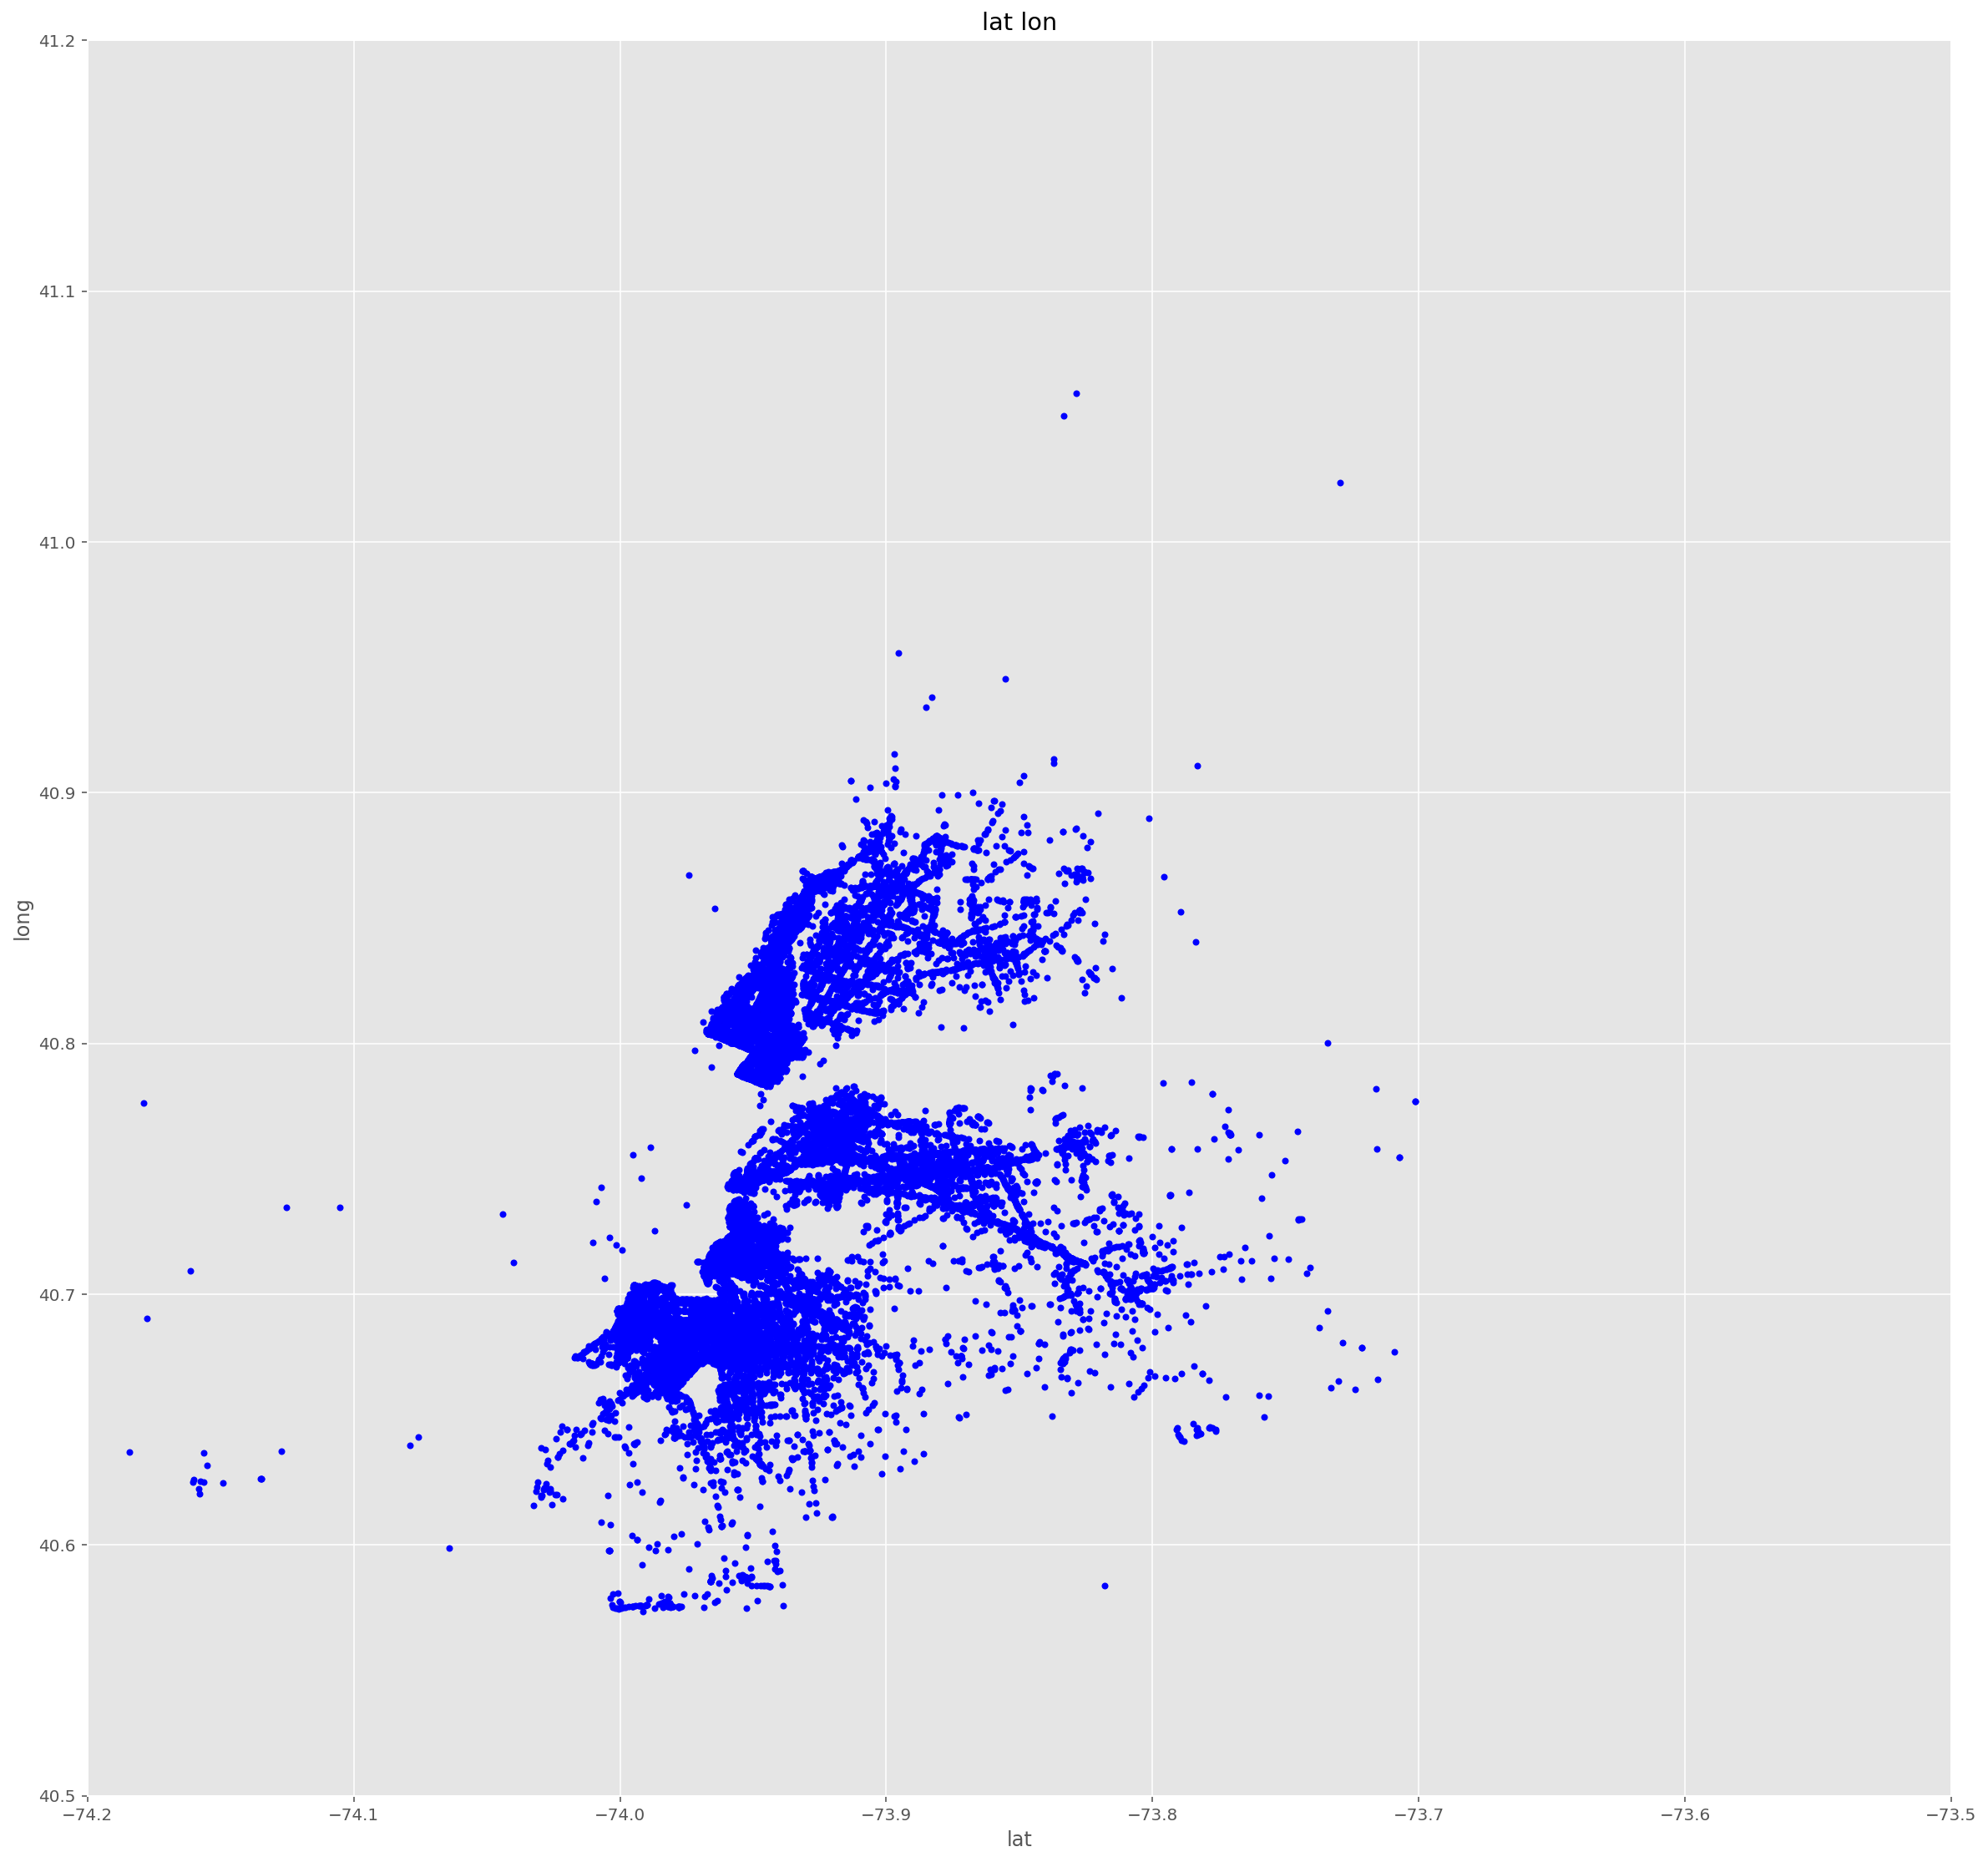

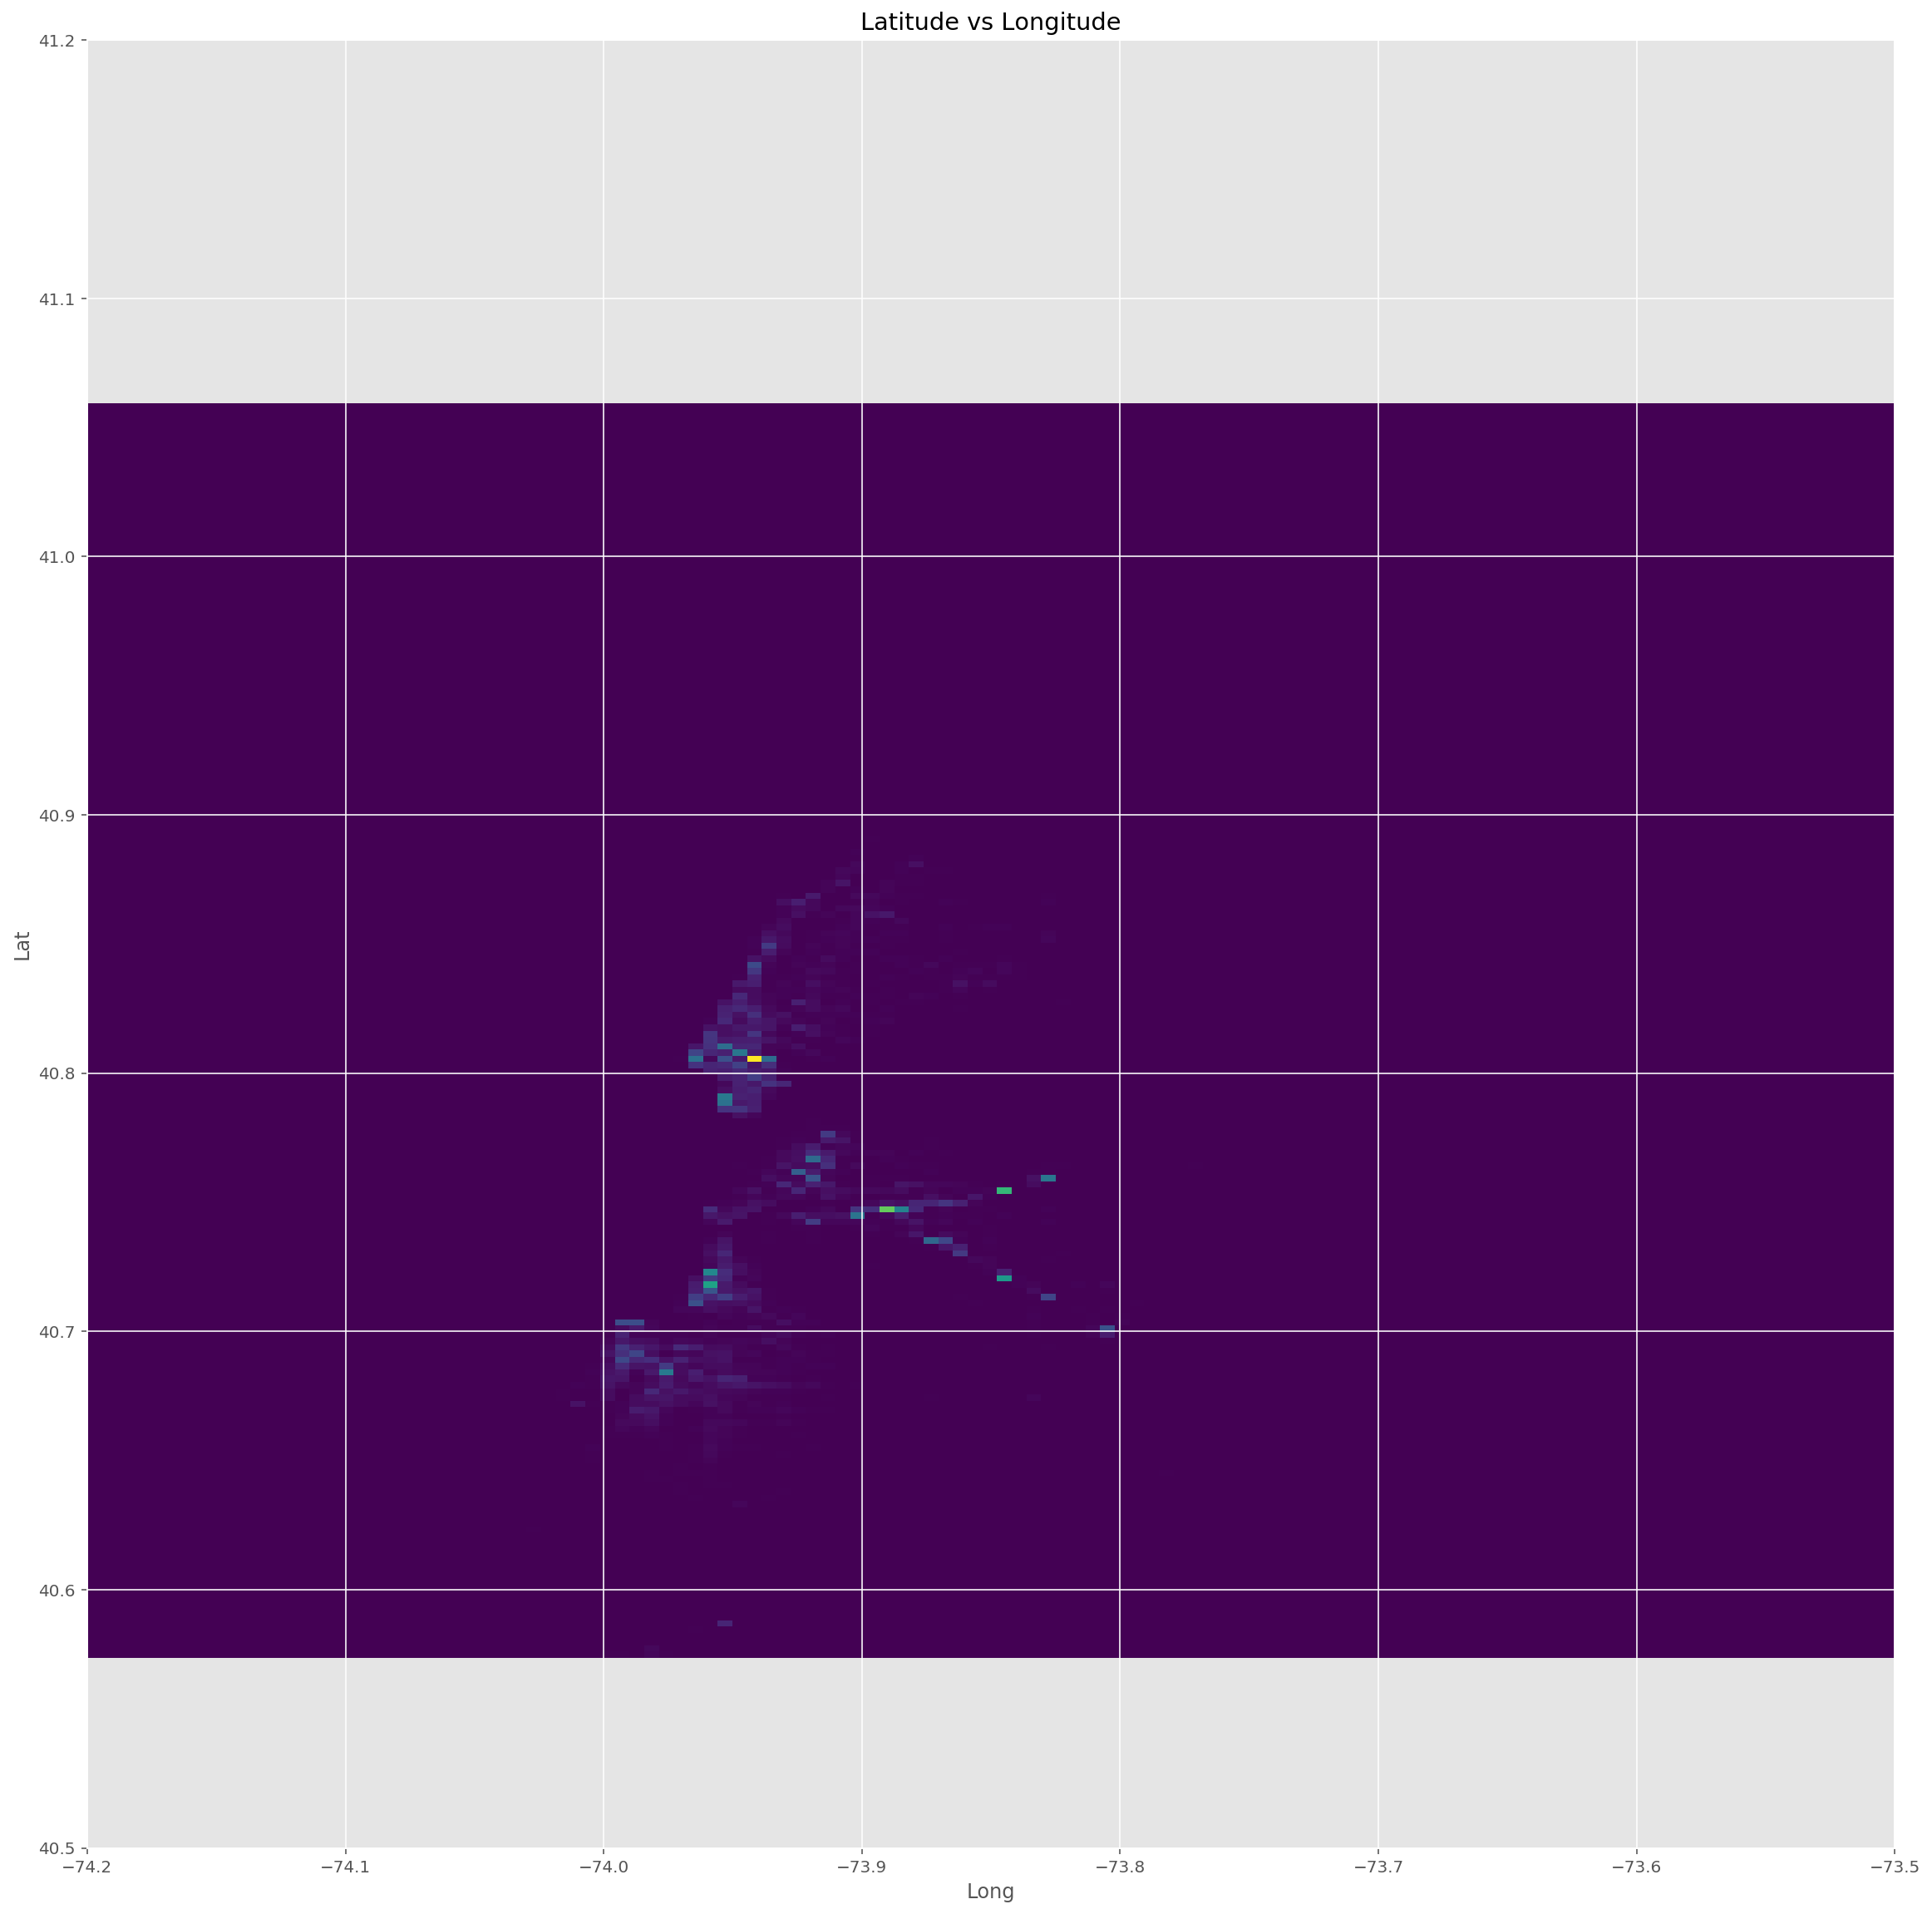

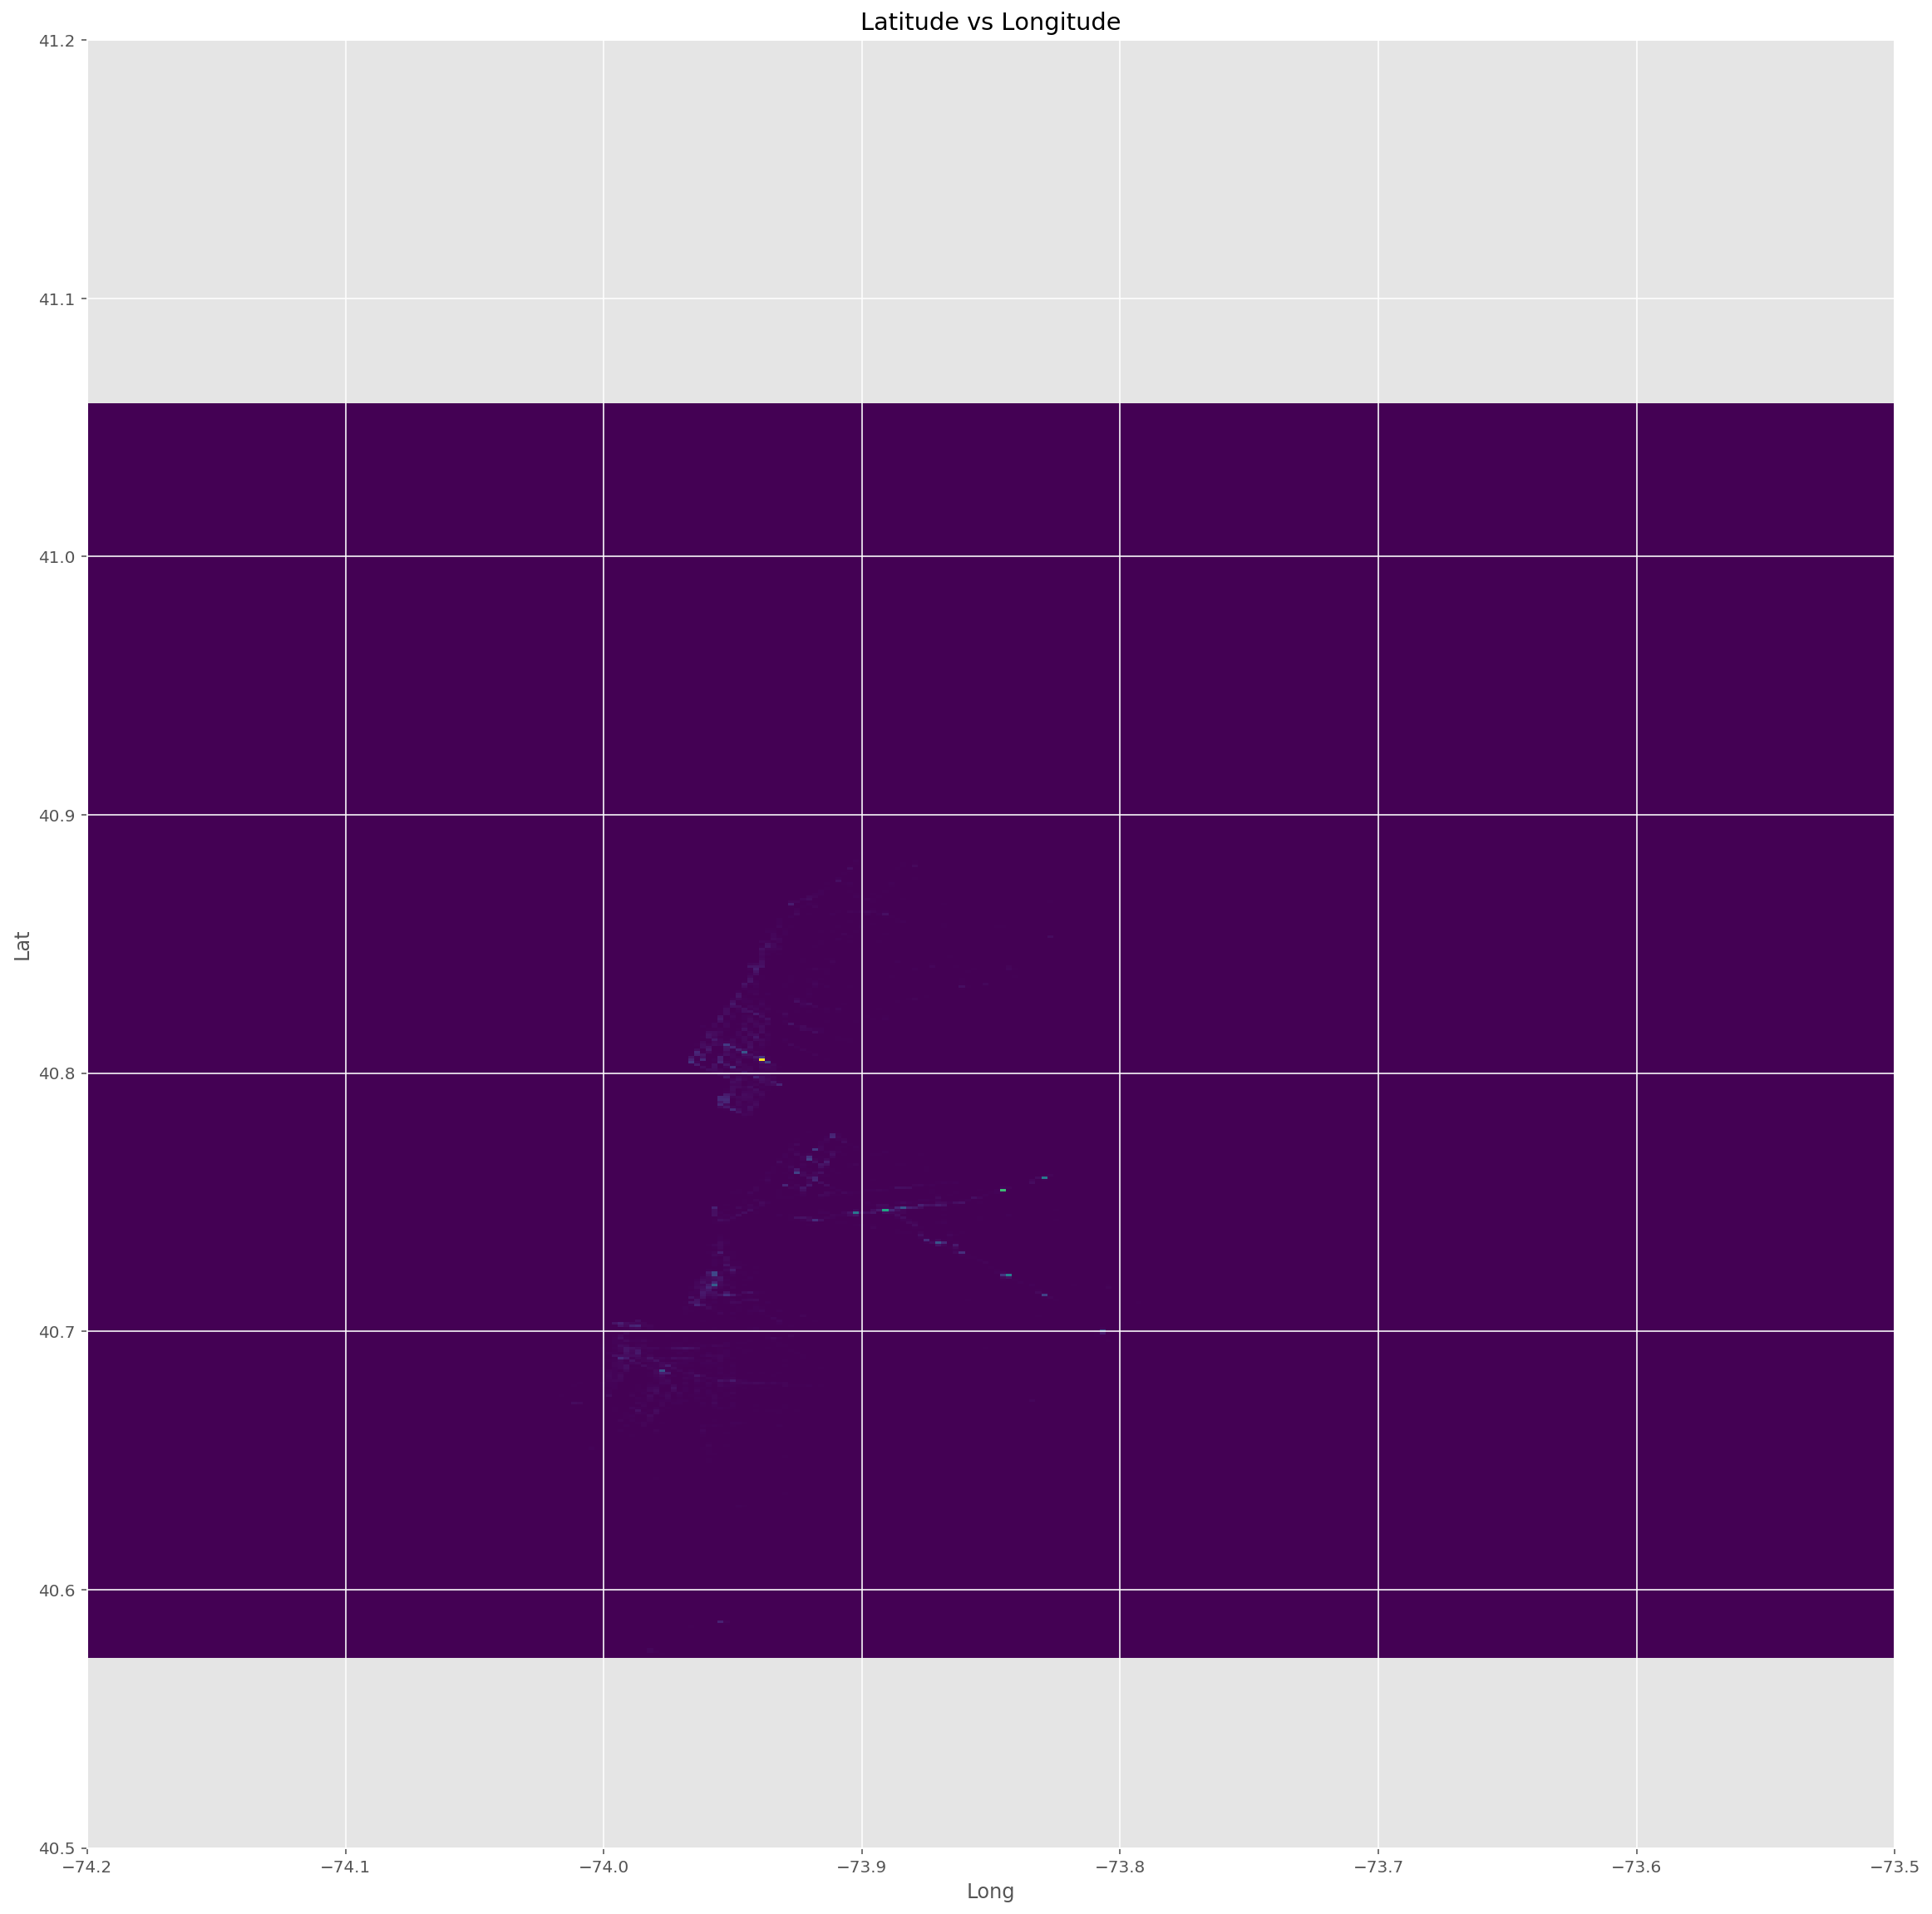

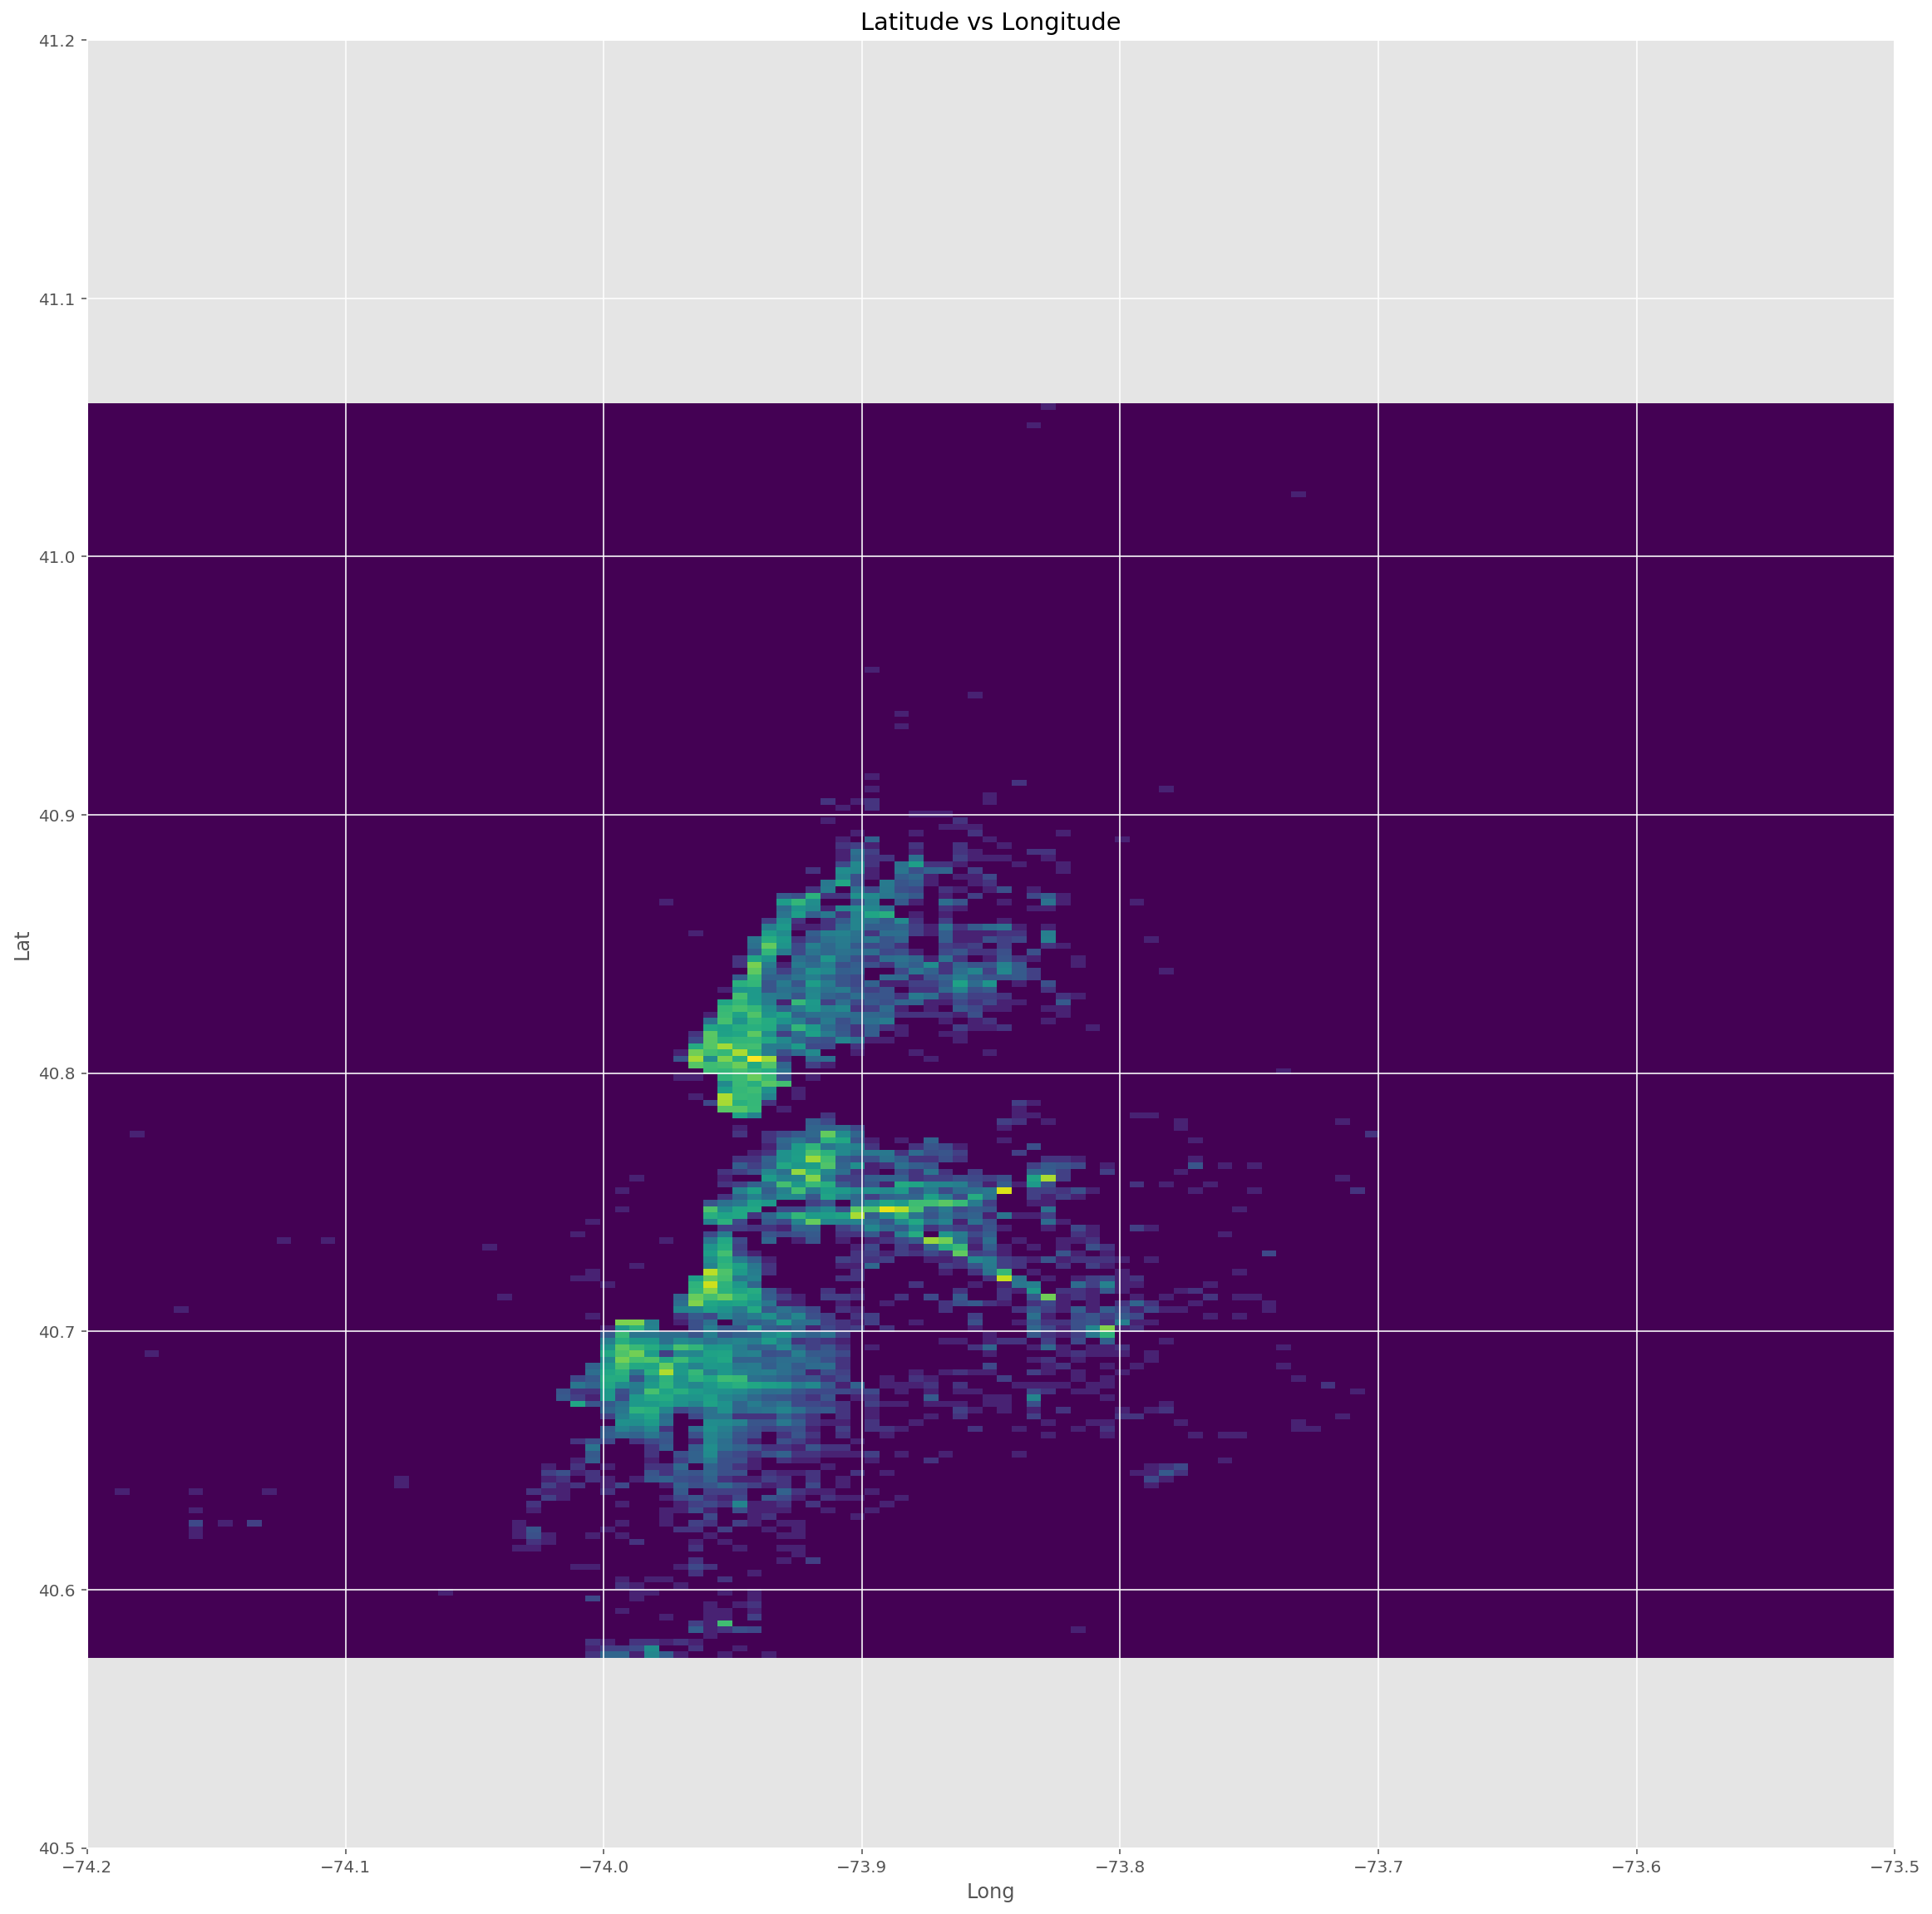

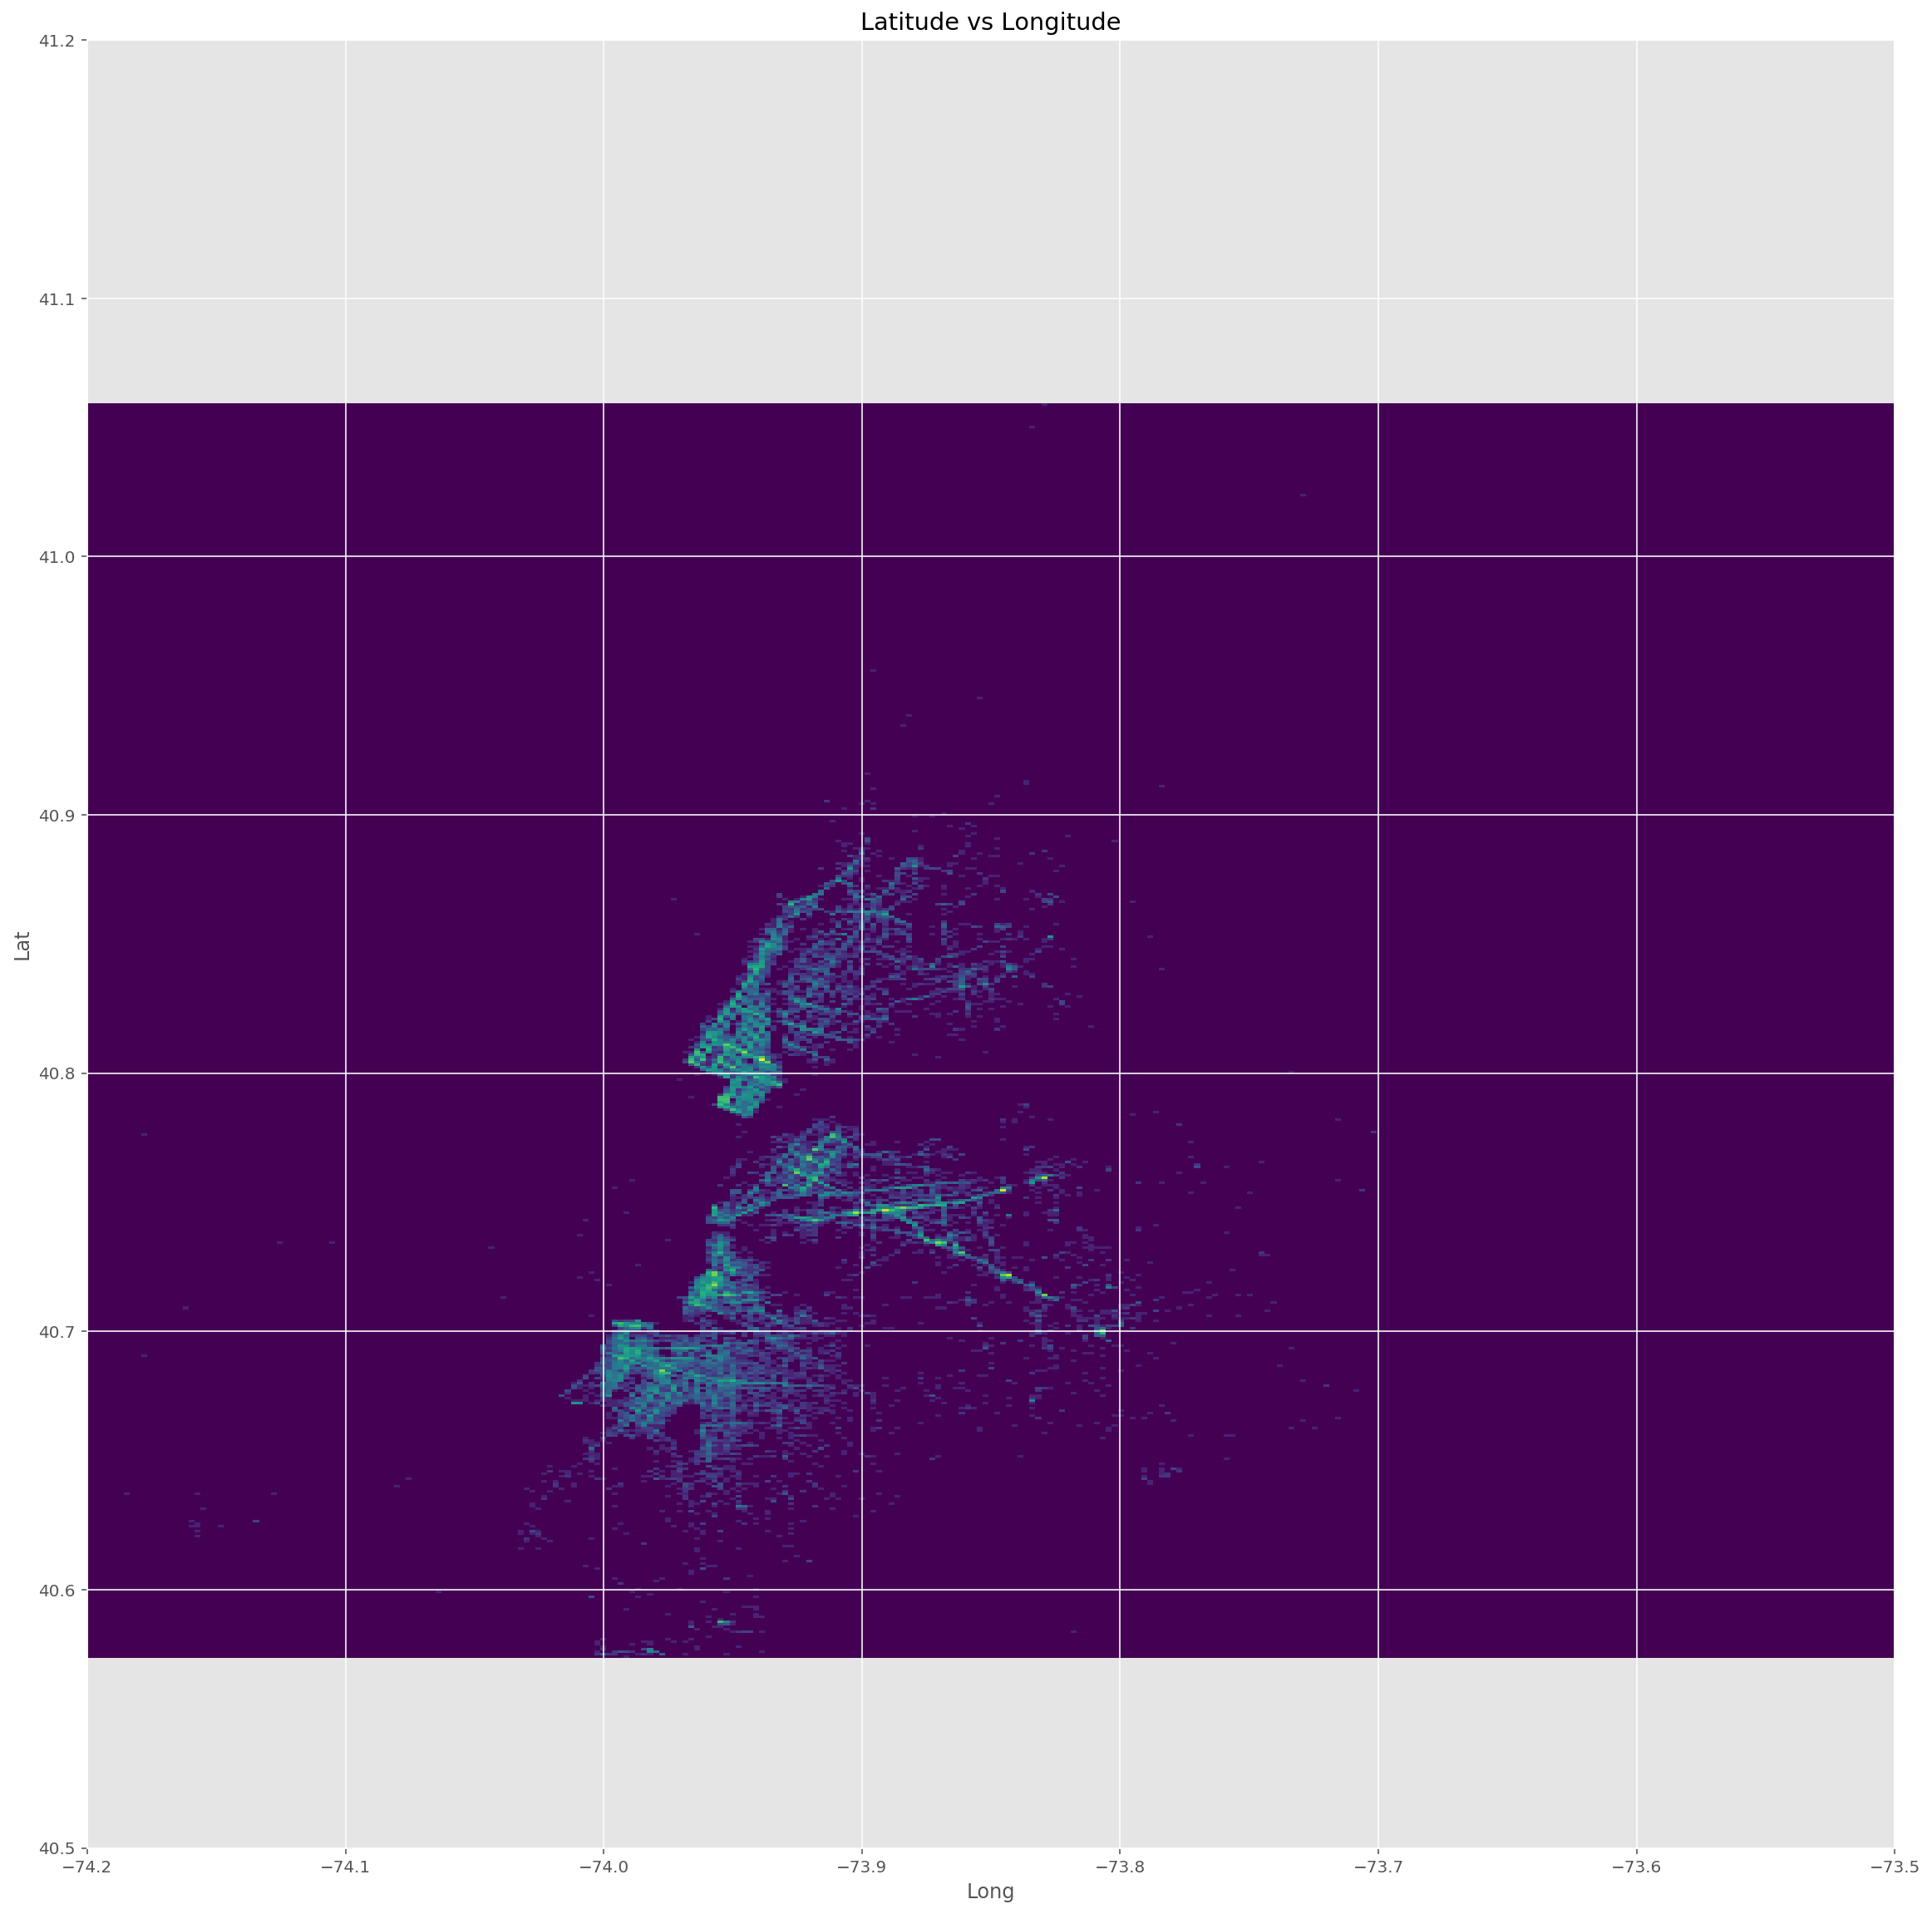

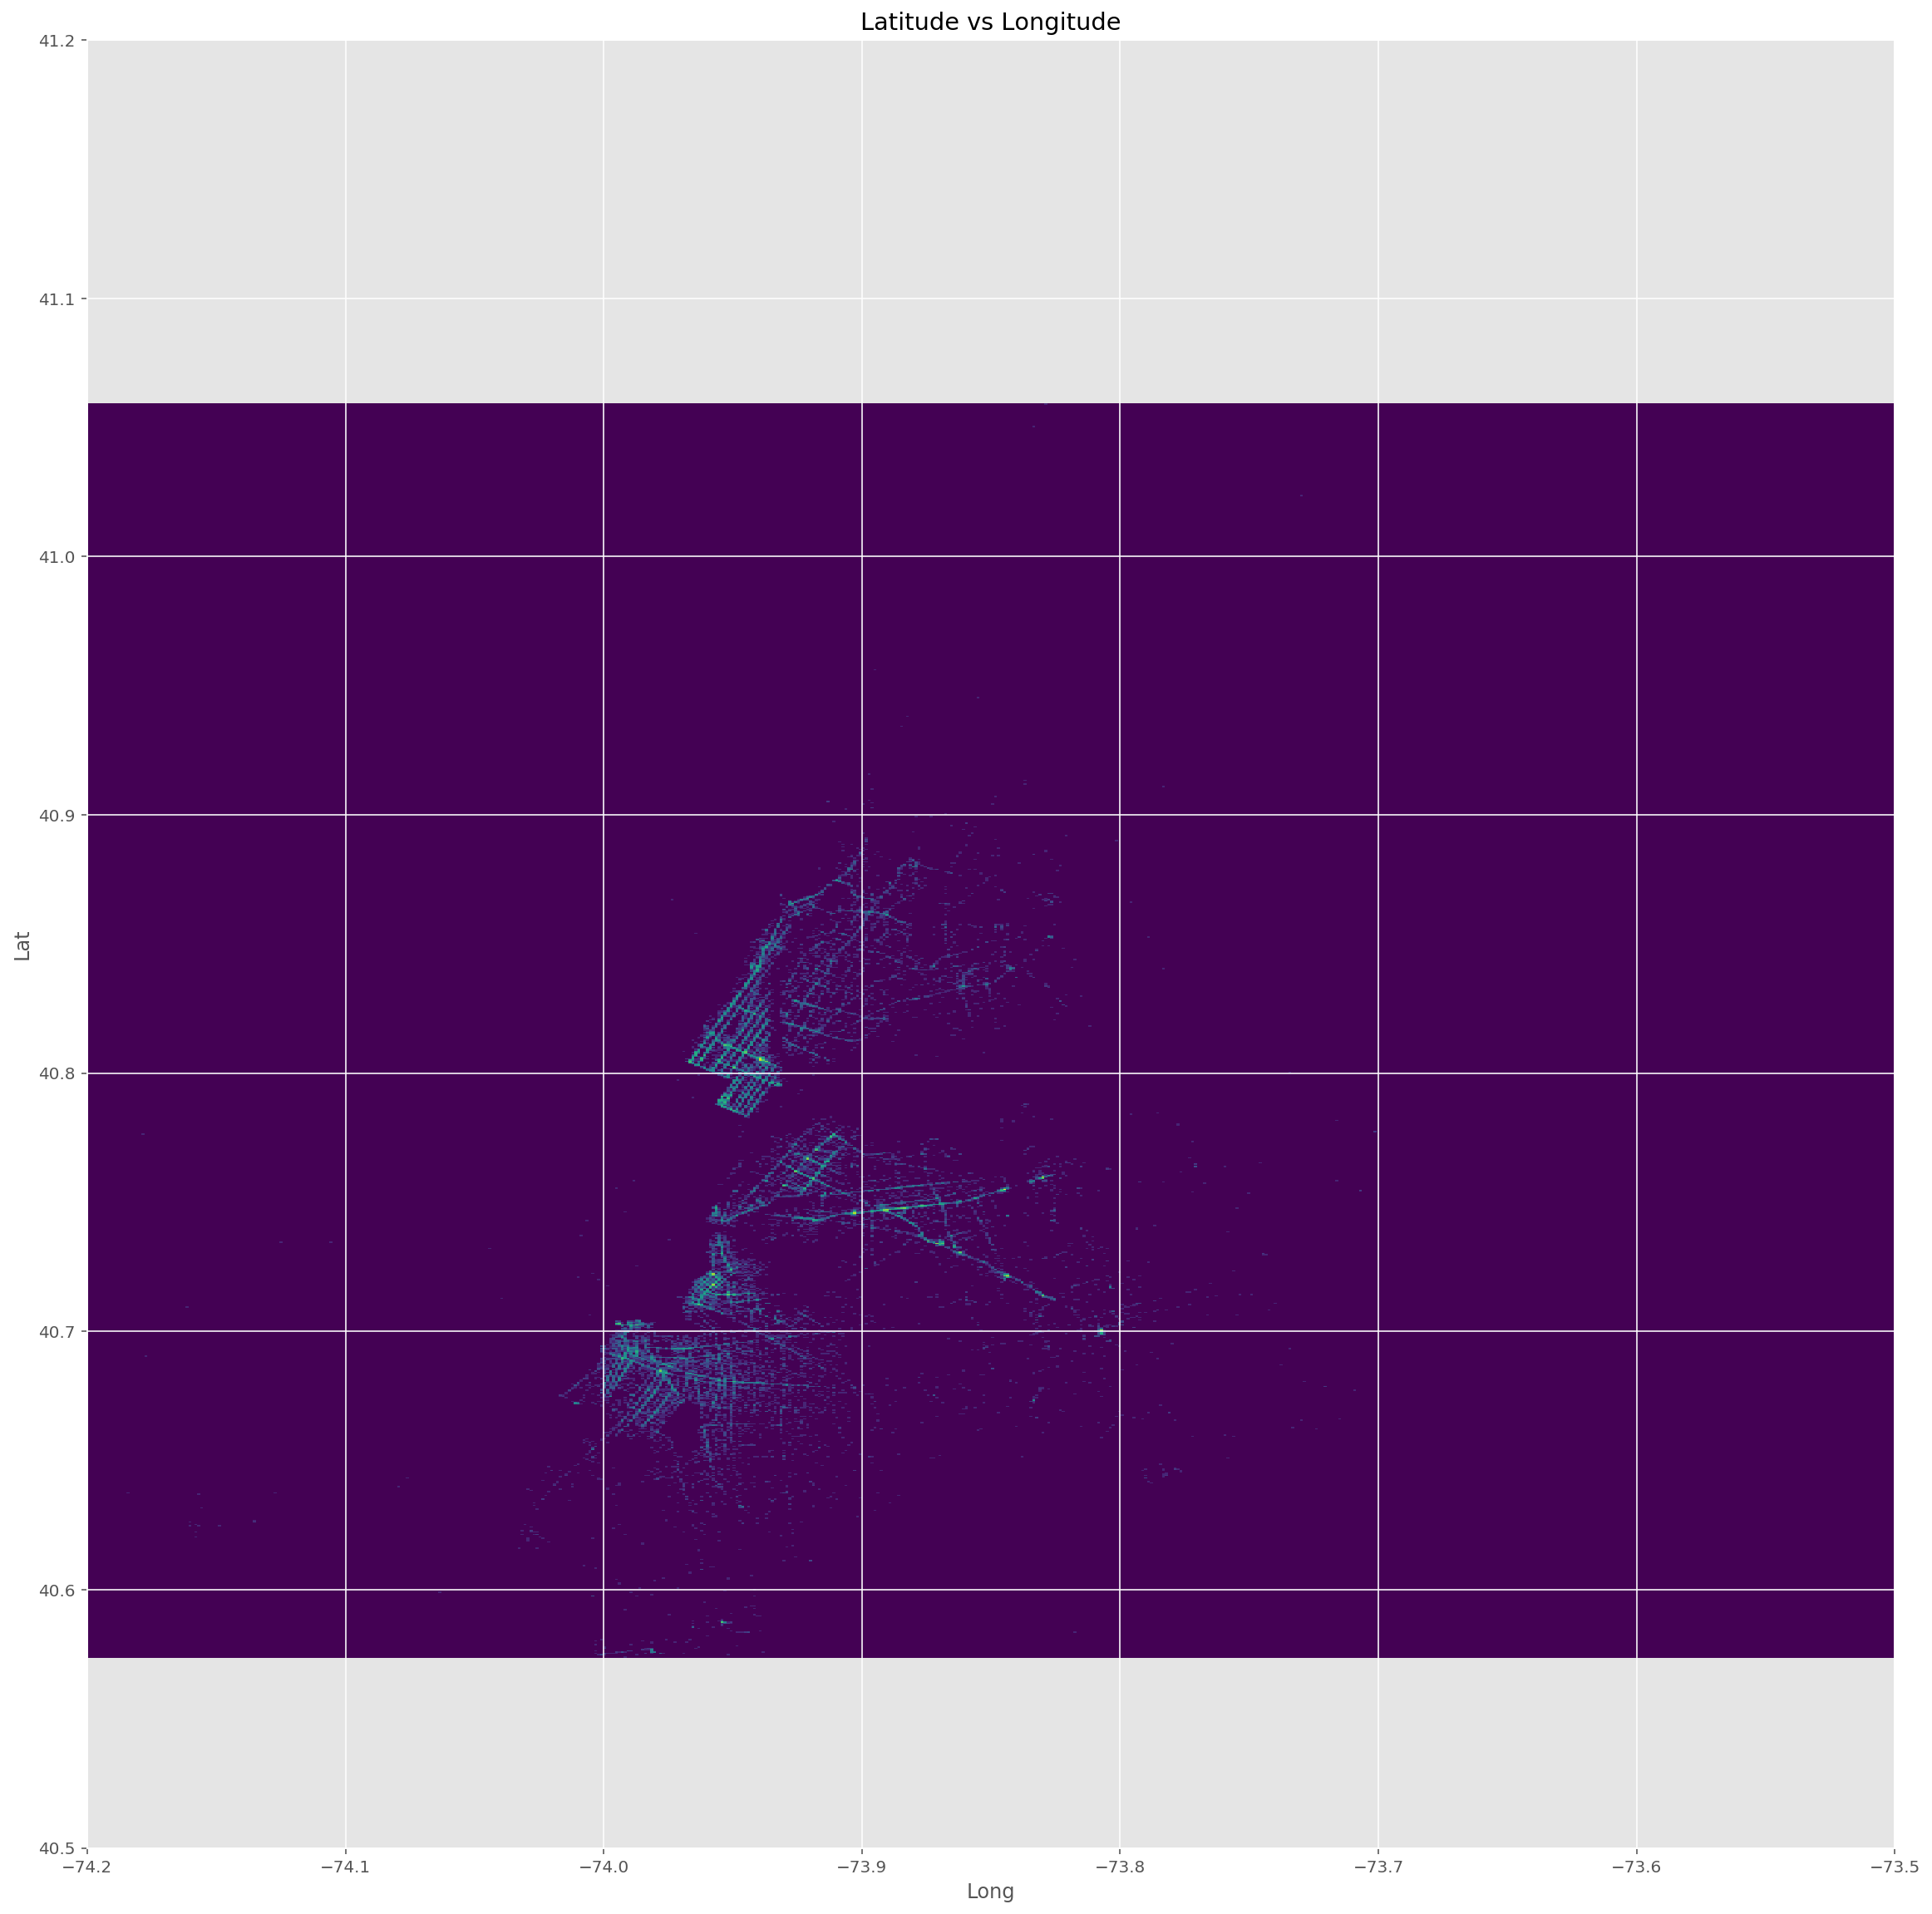

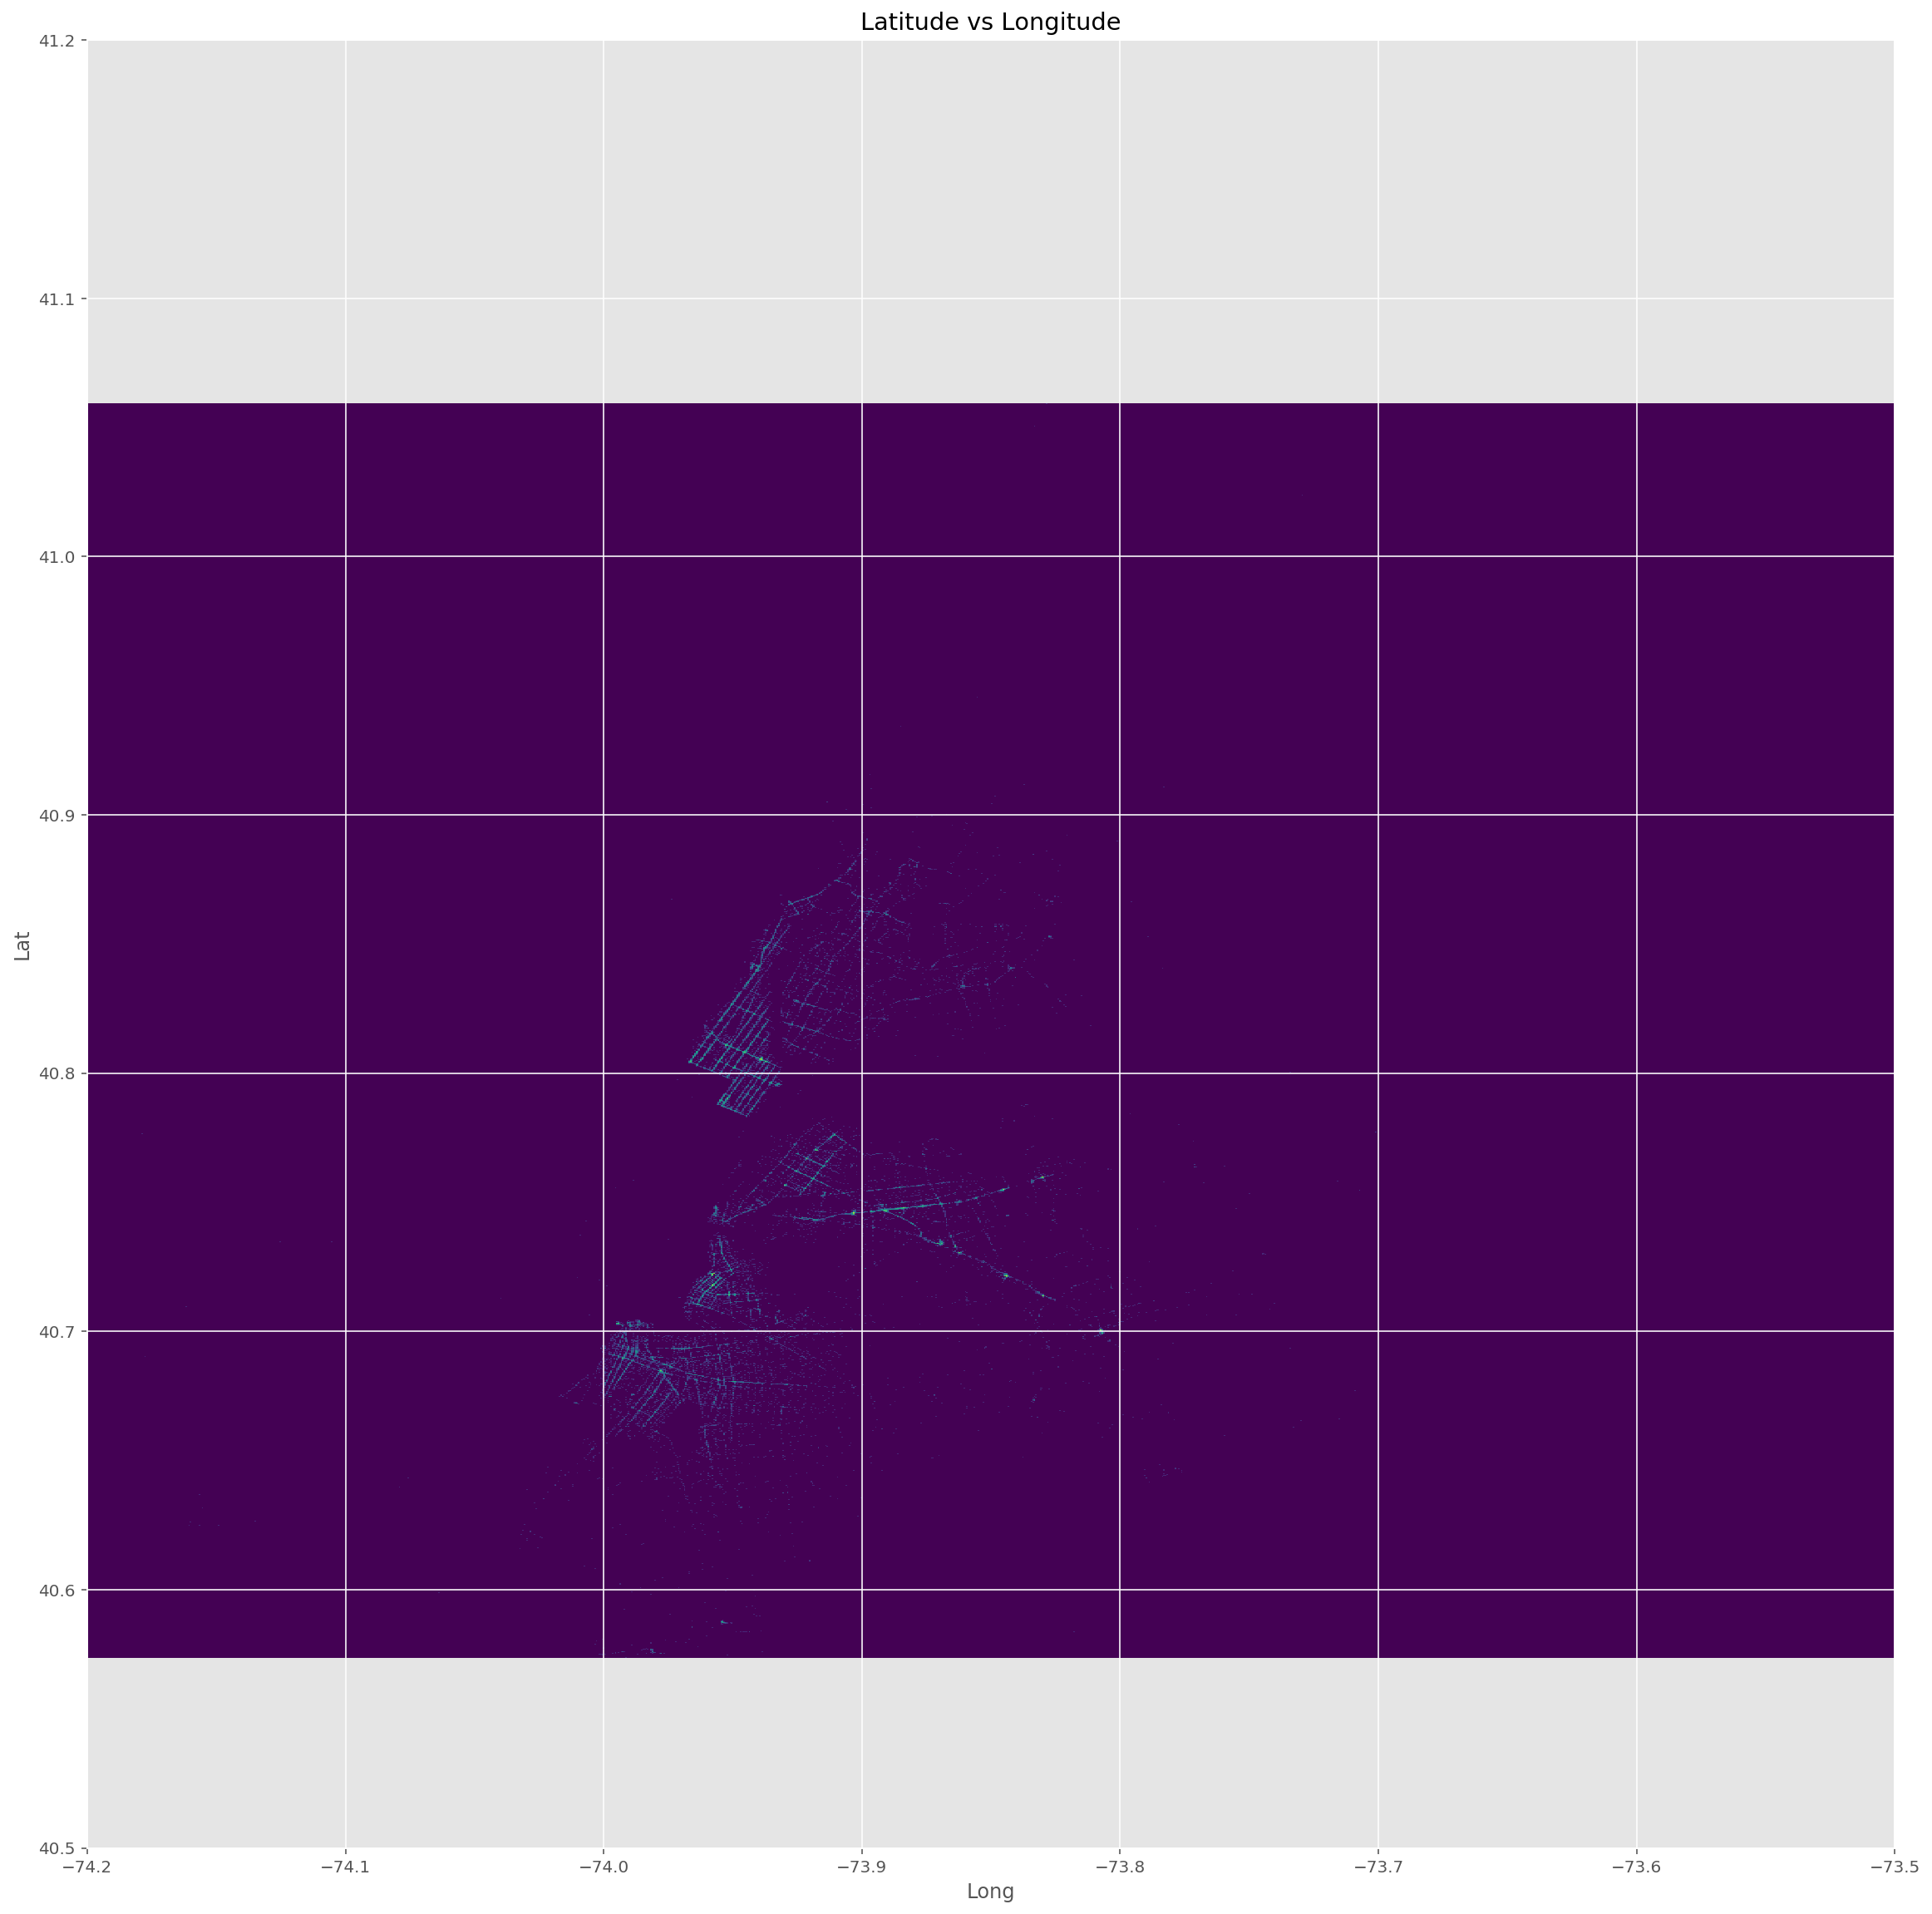

(40.6976701, -74.2598772)

In [7]:
plt.rcParams["figure.figsize"] = (20,20)
plt.gcf().subplots_adjust(bottom=0.15)
rawData = rawData[rawData['Pickup_longitude'] != 0]
rawData = rawData[rawData['Pickup_latitude'] != 0]

plt.plot(rawData["Pickup_longitude"], rawData["Pickup_latitude"], 'b.')
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.title("lat lon")
plt.ylabel("long")
plt.xlabel("lat")
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.savefig('lat long',dpi=300)
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.savefig('MAP!!',dpi=200)
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=1000)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.savefig('MAP!!!',dpi=300)

plt.show()
heatmap, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=2000)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.savefig('MAP!!!',dpi=300)
plt.show()
40.6976701,-74.2598772

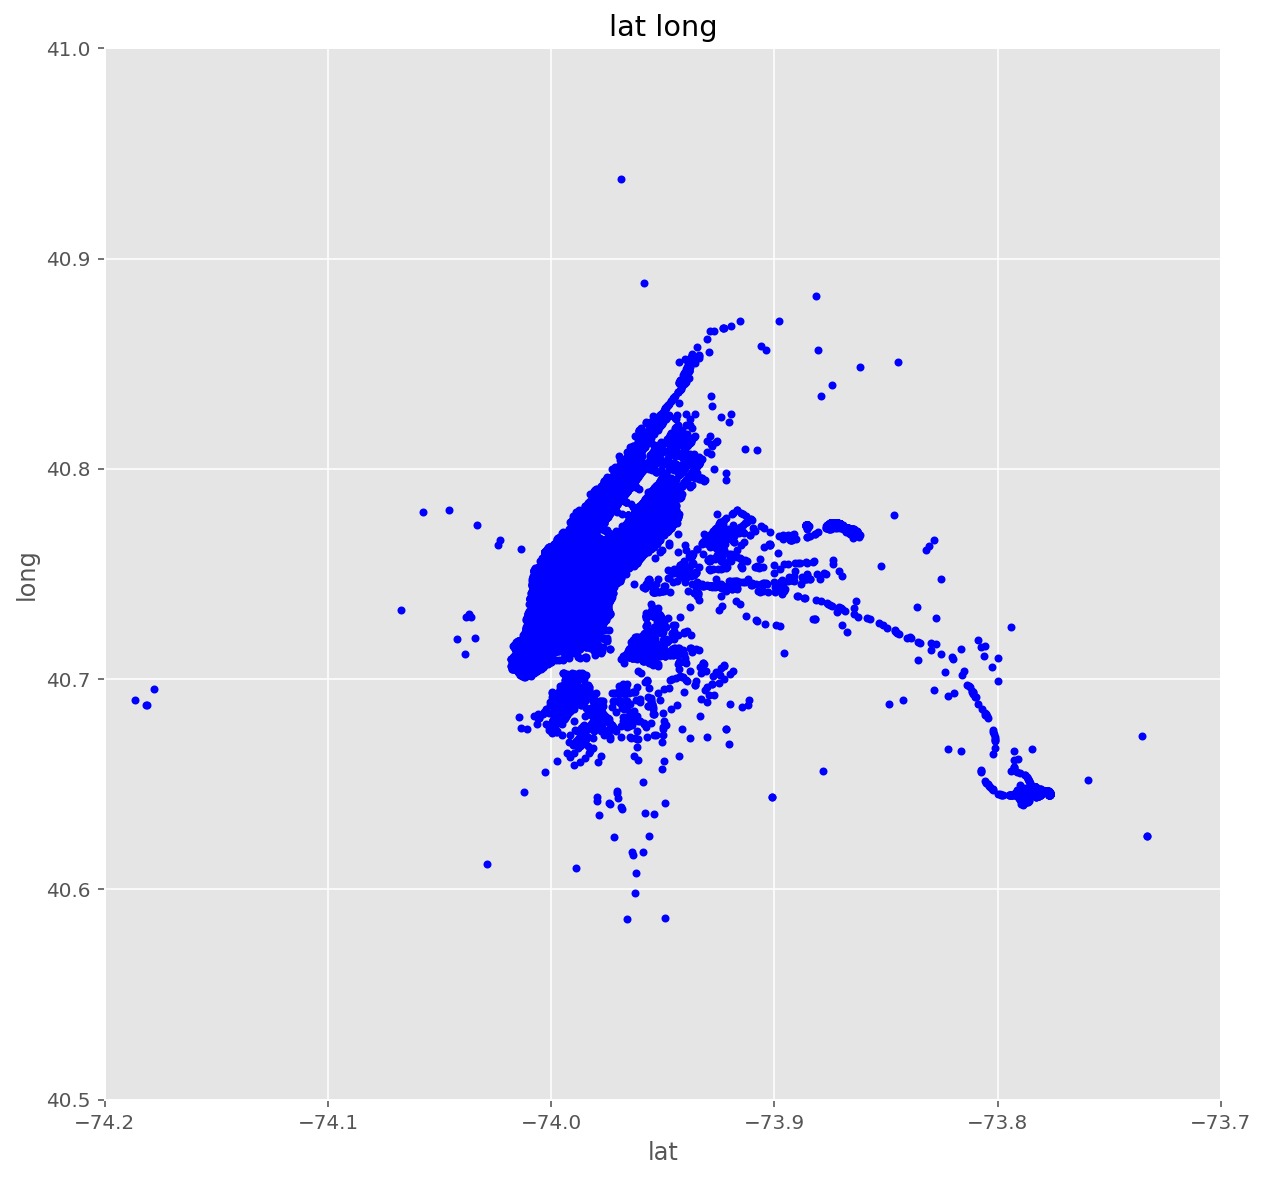

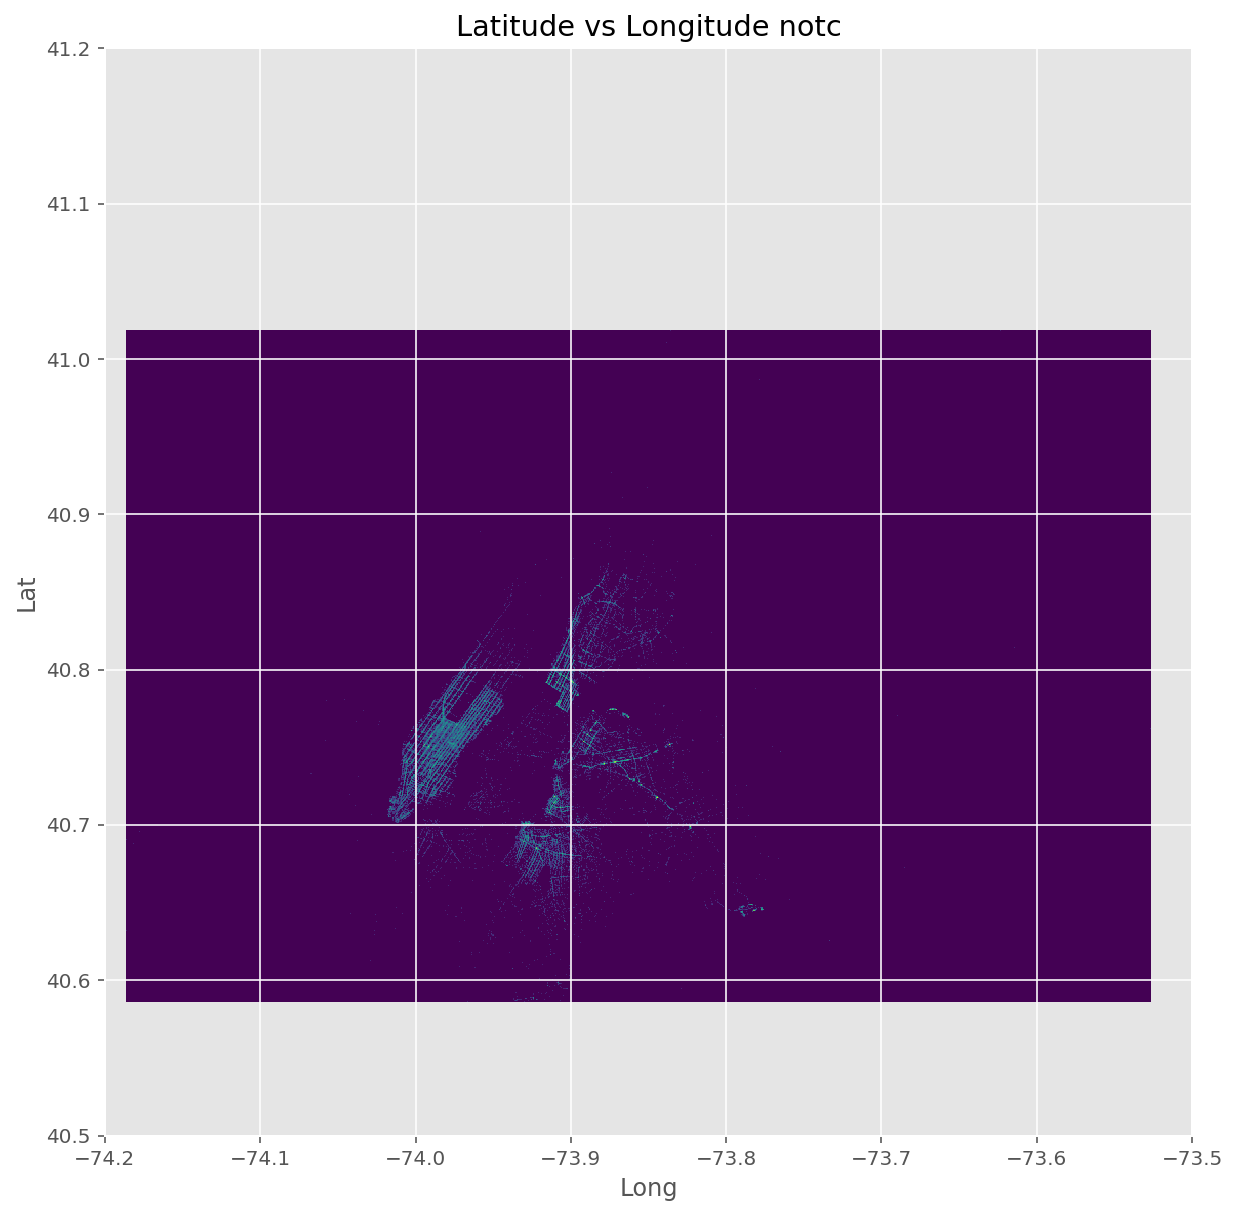

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
plt.gcf().subplots_adjust(bottom=0.15)
rawData2 = rawData2[rawData2['Pickup_longitude'] != 0]
rawData2 = rawData2[rawData2['Pickup_latitude'] != 0]
rawData2 = rawData2[rawData2['Pickup_longitude'] <= -73.5]
rawData2 = rawData2[rawData2['Pickup_longitude'] >= -74.2]
rawData2 = rawData2[rawData2['Pickup_latitude'] <= 41.2]
rawData2 = rawData2[rawData2['Pickup_latitude'] >= 40.5]
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)




plt.plot(rawData2["Pickup_longitude"], rawData2["Pickup_latitude"], 'b.')
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.title("lat long")
plt.ylabel("long")
plt.xlabel("lat")
plt.xlim(-74.2,-73.7)
plt.ylim(40.5,41.0)
plt.savefig('lat long notc',dpi=300)
plt.show()

heatmap, xedges, yedges = np.histogram2d(rawData2["Pickup_longitude"], rawData2["Pickup_latitude"], bins=1000)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap2, xedges, yedges = np.histogram2d(rawData["Pickup_longitude"], rawData["Pickup_latitude"], bins=1000)
heatmap = heatmap + heatmap2
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude notc")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
#plt.savefig('MAP!!!',dpi=300)

In [9]:
display(rawData[["Pickup_longitude", "Pickup_latitude"]])
result = pd.concat([rawData[["Pickup_longitude", "Pickup_latitude"]],rawData2[["Pickup_longitude", "Pickup_latitude"]]])
display(result)

,Pickup_longitude,Pickup_latitude
2,-73.950966,40.723640
3,-73.918633,40.759277
4,-73.986015,40.669369
5,-73.949318,40.713730
6,-73.845001,40.754974
7,-73.972778,40.647694
8,-73.953346,40.680717
9,-73.875534,40.770241
10,-73.947418,40.796398
11,-73.949608,40.801868


,Pickup_longitude,Pickup_latitude
2,-73.950966,40.723640
3,-73.918633,40.759277
4,-73.986015,40.669369
5,-73.949318,40.713730
6,-73.845001,40.754974
7,-73.972778,40.647694
8,-73.953346,40.680717
9,-73.875534,40.770241
10,-73.947418,40.796398
11,-73.949608,40.801868


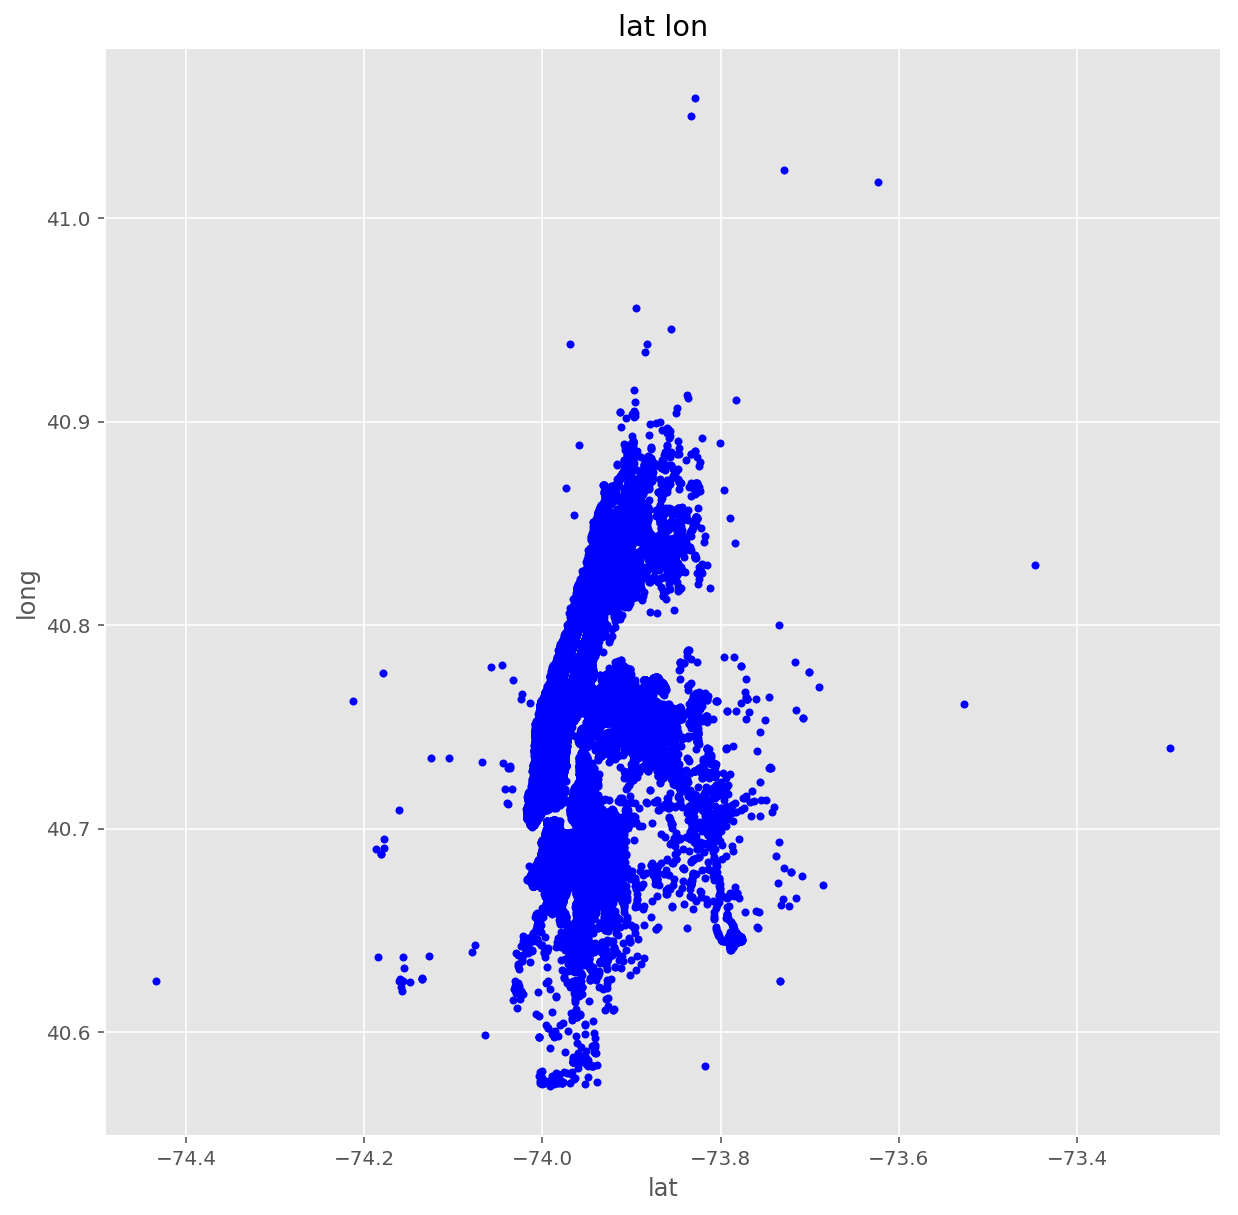

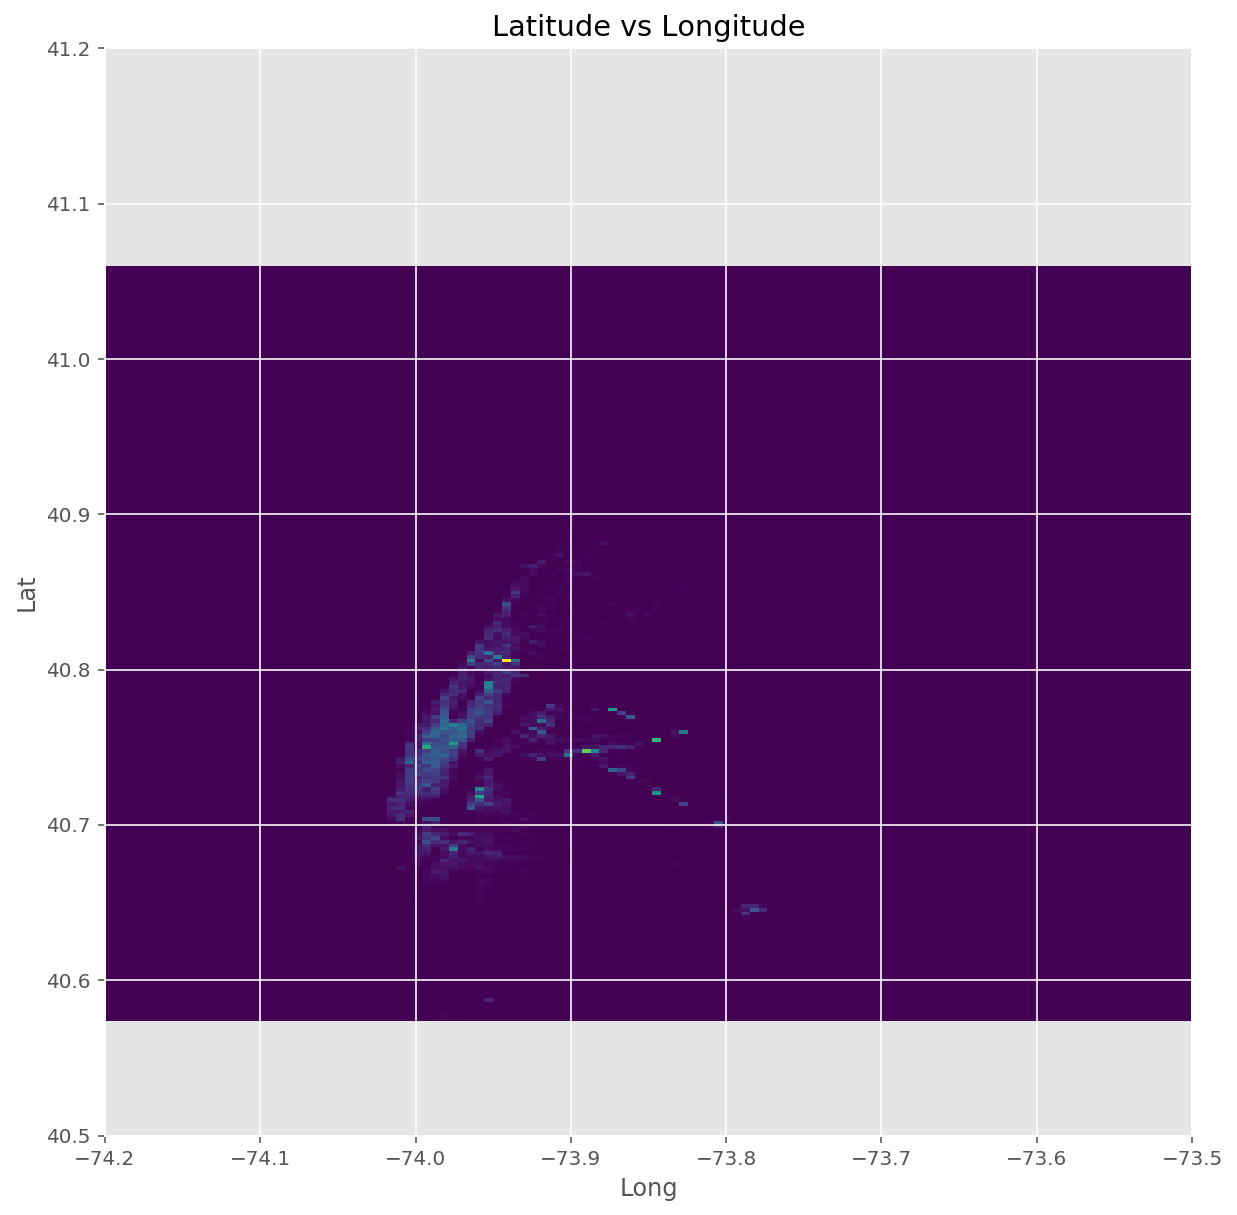

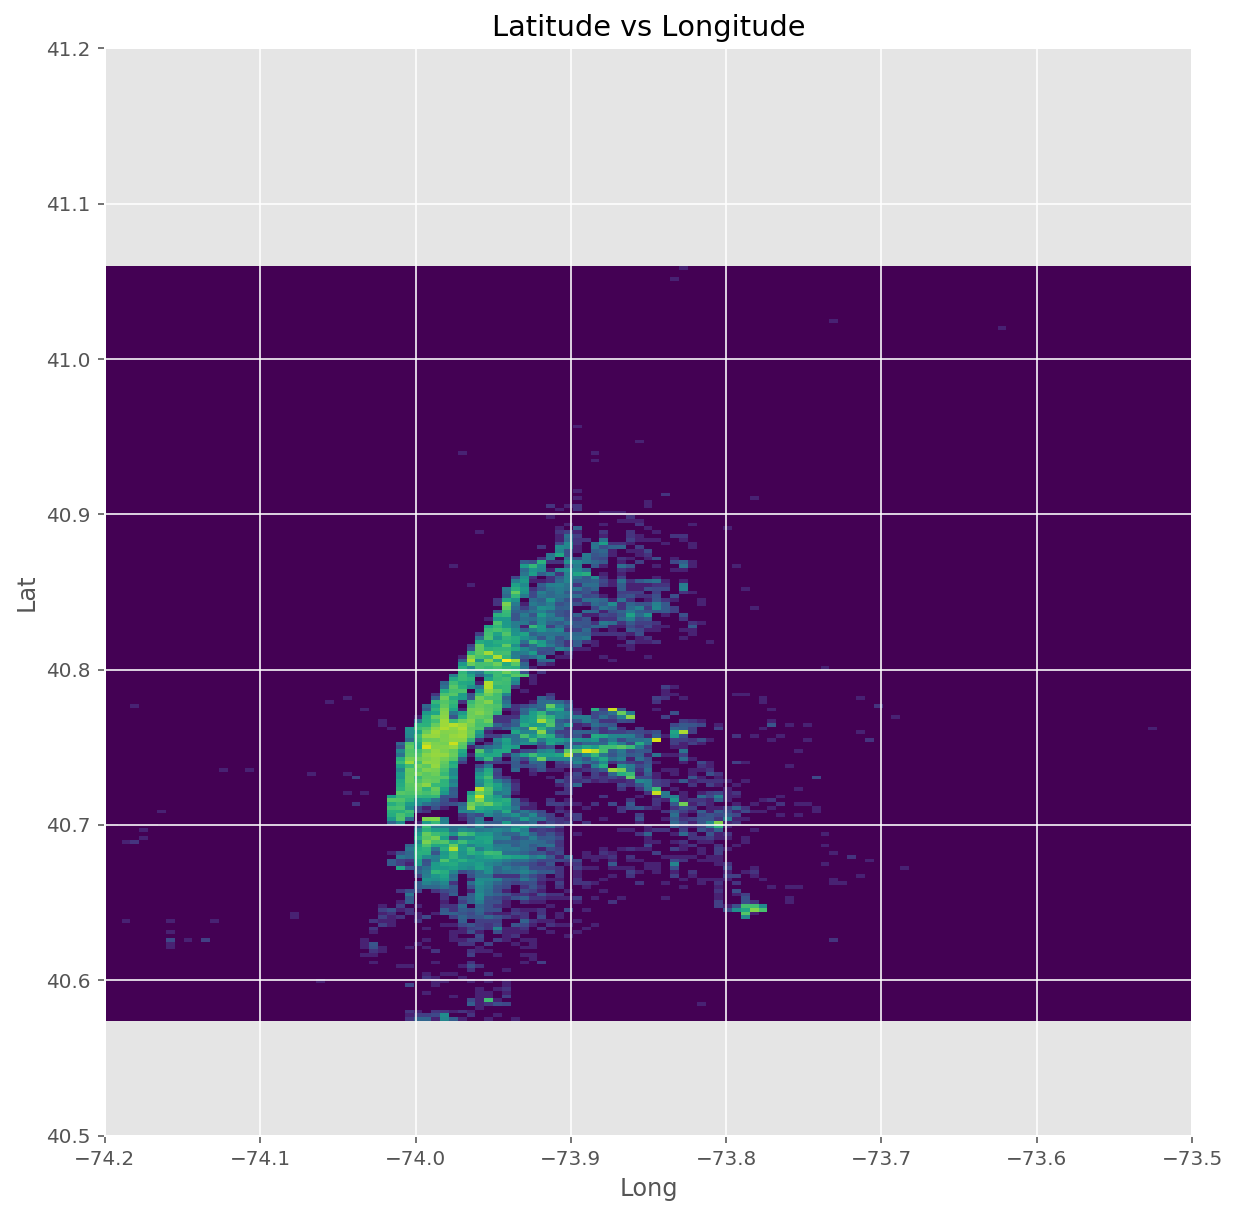

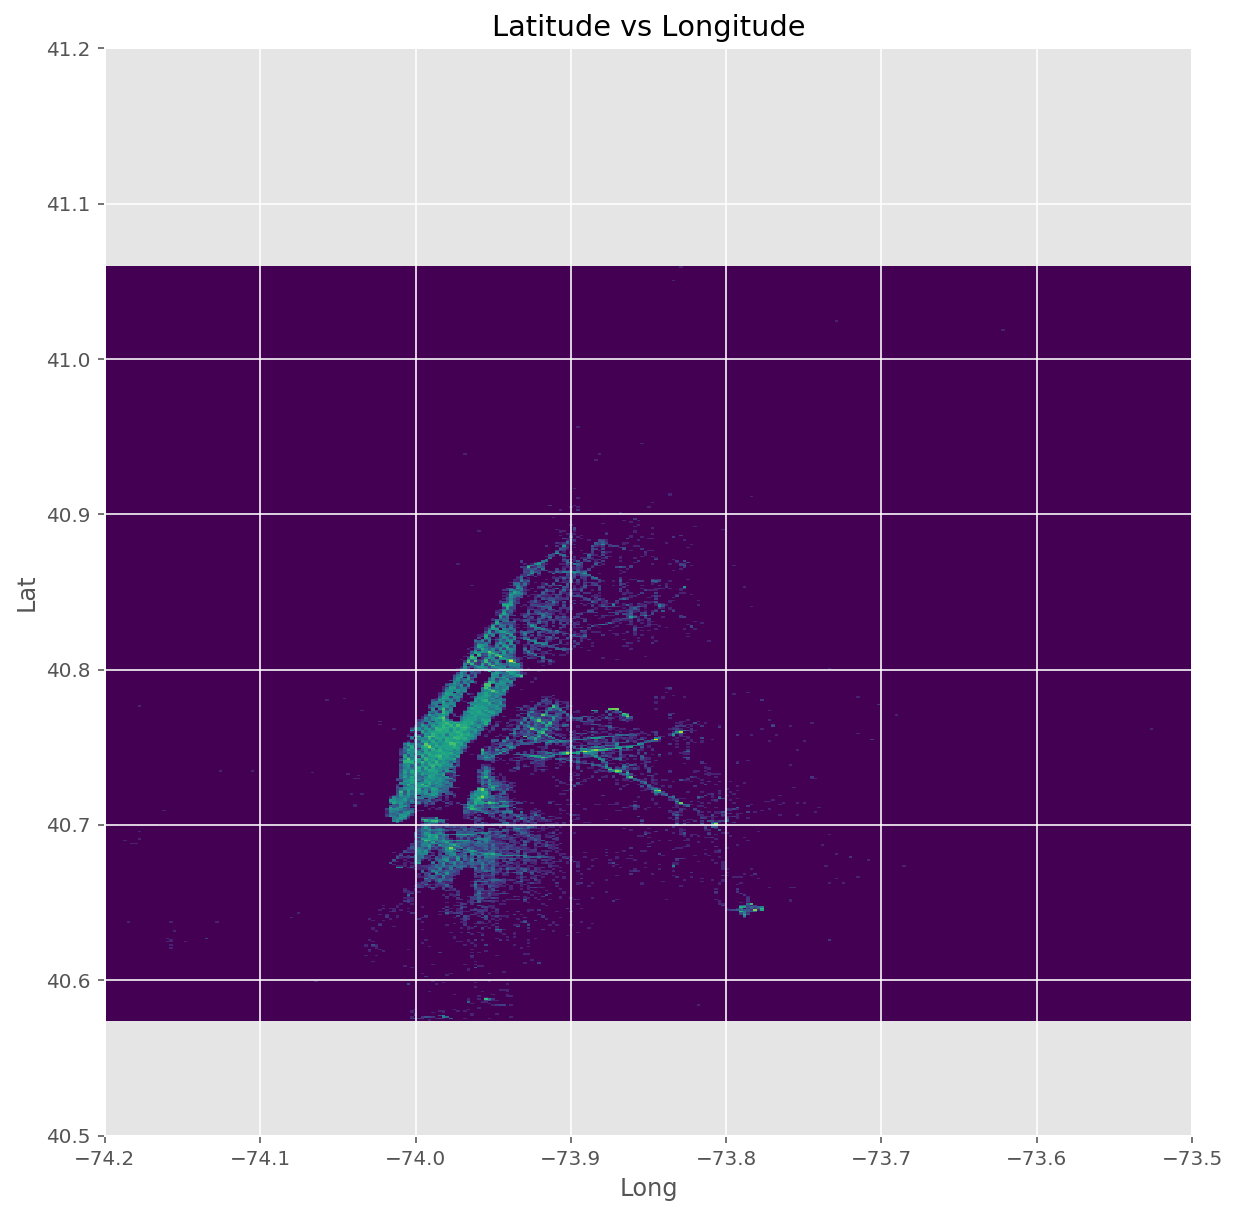

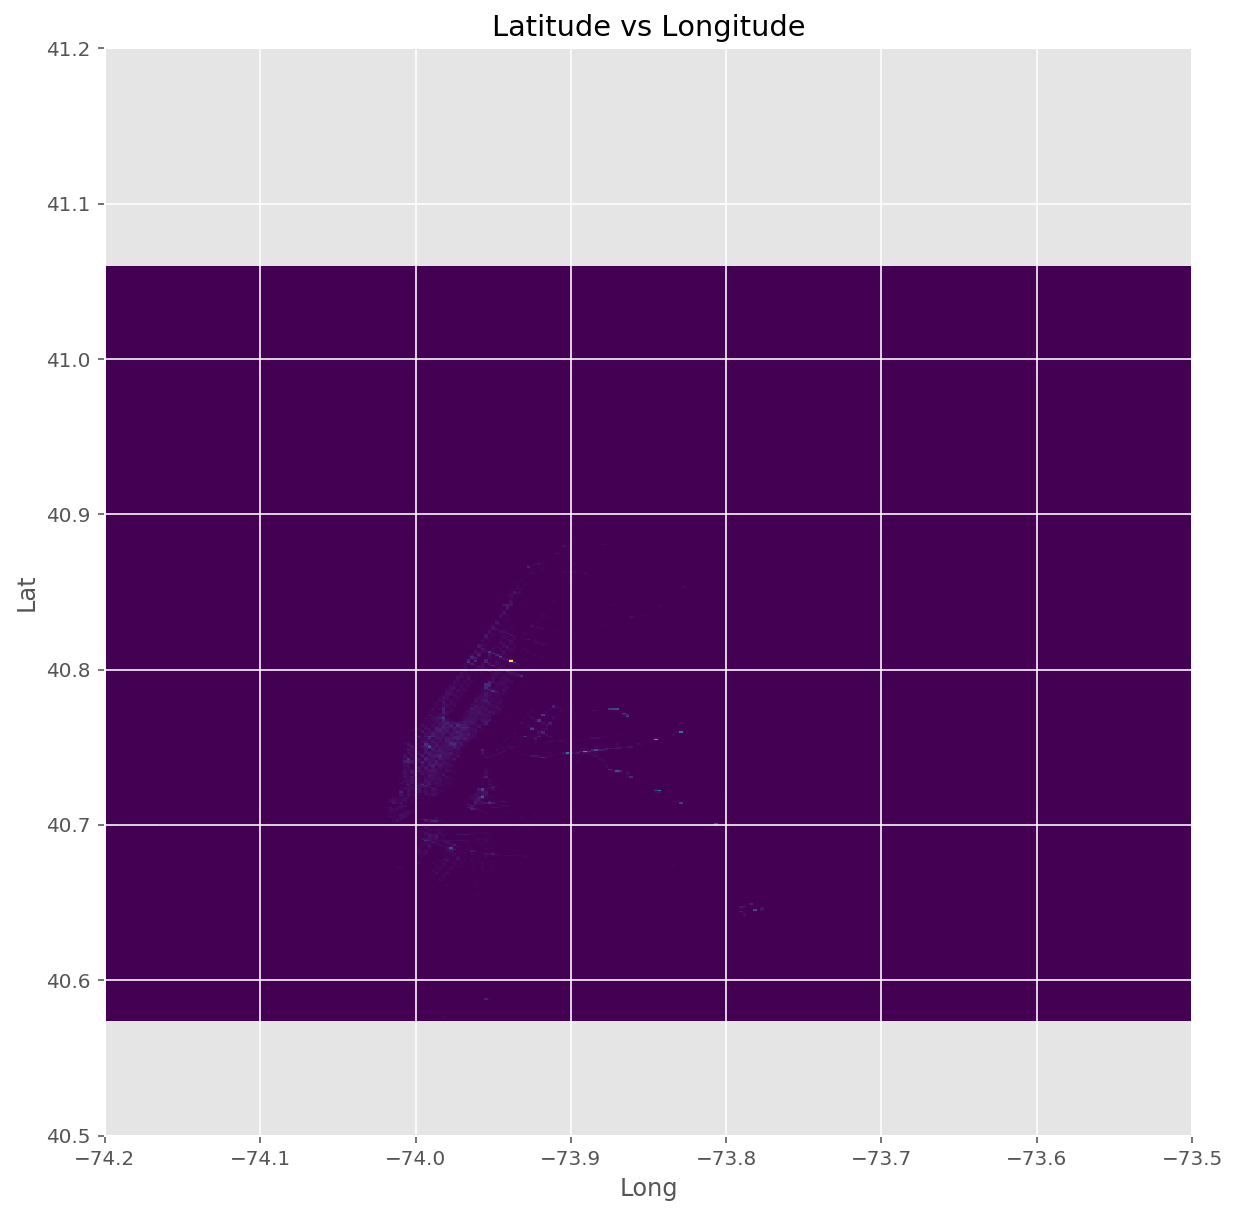

In [ ]:
plt.plot(result["Pickup_longitude"], result["Pickup_latitude"], 'b.')
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.title("lat lon")
plt.ylabel("long")
plt.xlabel("lat")
#plt.xlim(-74.2,-73.5)
#plt.ylim(40.5,41.2)
plt.savefig('lat long',dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
heatmap, xedges, yedges = np.histogram2d(result["Pickup_longitude"], result["Pickup_latitude"], bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig('nolg',dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
heatmap, xedges, yedges = np.histogram2d(result["Pickup_longitude"], result["Pickup_latitude"], bins=200)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig('MAP!!',dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
heatmap, xedges, yedges = np.histogram2d(result["Pickup_longitude"], result["Pickup_latitude"], bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig('MAP!!!!',dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
heatmap, xedges, yedges = np.histogram2d(result["Pickup_longitude"], result["Pickup_latitude"], bins=500)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig('nolg2',dpi=300)
plt.show()

plt.rcParams["figure.figsize"] = (20,20)
heatmap, xedges, yedges = np.histogram2d(result["Pickup_longitude"], result["Pickup_latitude"], bins=2000)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
heatmap = heatmap + 1
heatmap = np.log(heatmap)
plt.clf()
plt.xlim(-74.2,-73.5)
plt.ylim(40.5,41.2)
plt.title("Latitude vs Longitude")
plt.ylabel("Lat")
plt.xlabel("Long")
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.savefig('MAP!!!!!',dpi=200)
plt.show()